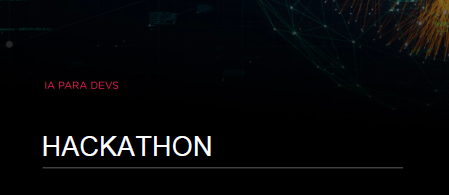

A FIAP VisionGuard, empresa de monitoramento de câmeras de segurança, está analisando a viabilidade de uma nova funcionalidade para otimizar o seu software.

O objetivo da empresa é usar de novas tecnologias para identificar situações atípicas e que possam colocar em risco a segurança de estabelecimentos e comércios que utilizam suas câmeras.

Um dos principais desafios da empresa é utilizar Inteligência Artificial para identificar objetos cortantes (facas, tesouras e similares) e emitir alertas para a central de segurança.

A empresa tem o objetivo de validar a viabilidade dessa feature, e para isso, será necessário fazer um MVP para detecção supervisionada desses objetos.

#🔭 VISÃO GERAL DO PROJETO - Detecção de Objetos Cortantes com IA

##🎯 Objetivo

  - Criar um MVP com detecção supervisionada de objetos cortantes (facas, tesouras etc.) em vídeos de segurança, com:

- Dataset anotado

- Modelo treinado

- Detecção em vídeo

- Sistema de alerta simples (e-mail/log/print)

- Documentação clara e código reprodutível via Google Colab e GitHub

##🧭 ROADMAP GERAL DO MVP

Etapa	Nome	Ferramentas	Resultado Esperado

* 1	Setup do ambiente	Colab + GitHub	Ambiente com libs e conexão com o Drive

* 2	Preparação do Dataset	Roboflow + imagens	Dataset anotado com classes faca, tesoura, etc.

* 3	Treinamento do modelo	YOLO (Ultralytics)	Modelo treinado .pt

* 4	Teste em vídeo	OpenCV + modelo	Bounding boxes nos vídeos com precisão razoável

* 5	Sistema de alerta	e-mail/logs	Alerta ao detectar objeto cortante

* 6	Deploy de script final	GitHub + Colab	Código documentado + link funcional

* 7	Documentação + vídeo	Markdown + vídeo de 15min	Explicação clara do processo

In [ ]:
#🔧 Etapa 1 - Setup do Ambiente

# 📁 Instalar dependências e conectar com Google Drive
!pip install -q ultralytics opencv-python-headless roboflow

from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.0 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remo

###🛠️ Guia Visual Passo a Passo – Roboflow para Detecção de Facas e Tesouras

🔗 1. Acesse: https://roboflow.com

Crie uma conta gratuita ou entre com Google/GitHub.

🧪 2. Crie um novo projeto

Clique em “Create New Project”

Preencha os campos:

- Campo	Valor sugerido
- Project Name	Cortantes
- Project Type	Object Detection
- Annotation Group	bounding box
- License	Public (ou Private se preferir)

🖼️ 3. Adicione as imagens

✅ Para imagens positivas:
Download os datasets sugeridos:

- Knives Dataset

-
Scissors Detection

Clique em "Upload Images" no seu projeto Roboflow

Selecione os arquivos .jpg/.png e as labels .txt (caso exportadas de outro projeto)

❌ Para imagens negativas:

Faça upload de imagens sem objetos cortantes (ex: cozinha vazia, sala, rua)

Não anote nada nessas imagens (o próprio Roboflow entende como "background")


🏷️ 4. Verifique as anotações

Vá em “Annotations” e revise cada imagem.

Verifique se as classes estão corretas:

knife, scissors, cutter, etc.

Renomeie classes, se necessário, em “Classes” > “Edit”



⚙️ 5. Gerar versão do dataset
Clique em “Generate Dataset”

Escolha:

Resize: 640x640 (YOLO padrão)

Augmentations: Horizontal Flip, Blur, Exposure, etc. (opcional)

📦 6. Exportar o dataset (formato YOLO8)

Após gerar, vá em “Download Dataset”

Escolha o formato: YOLOv8

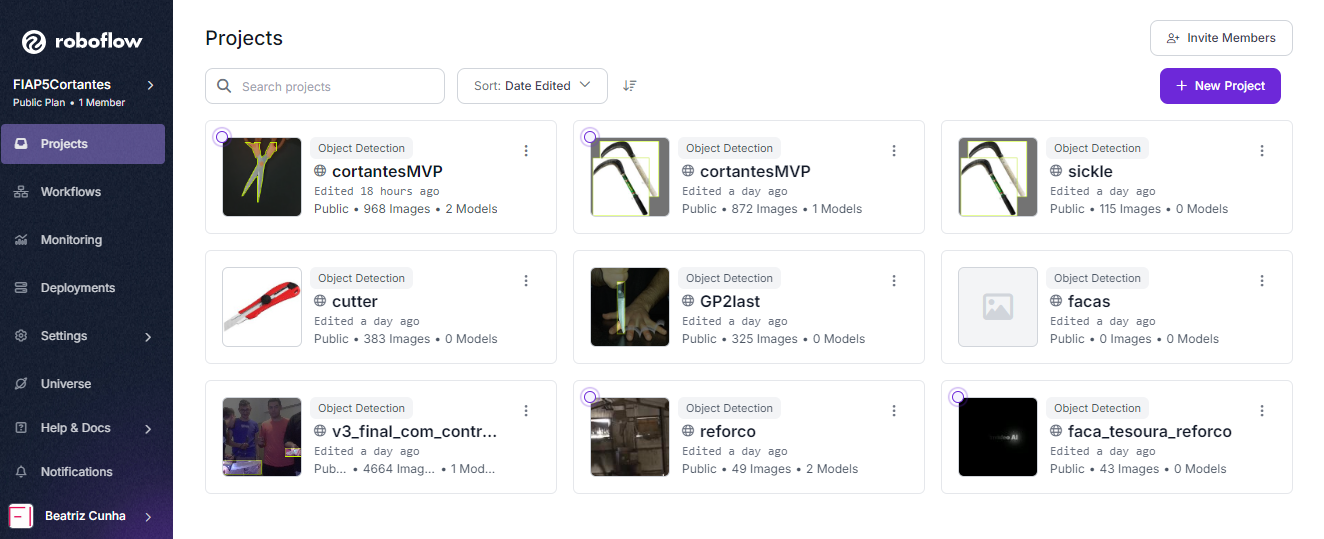

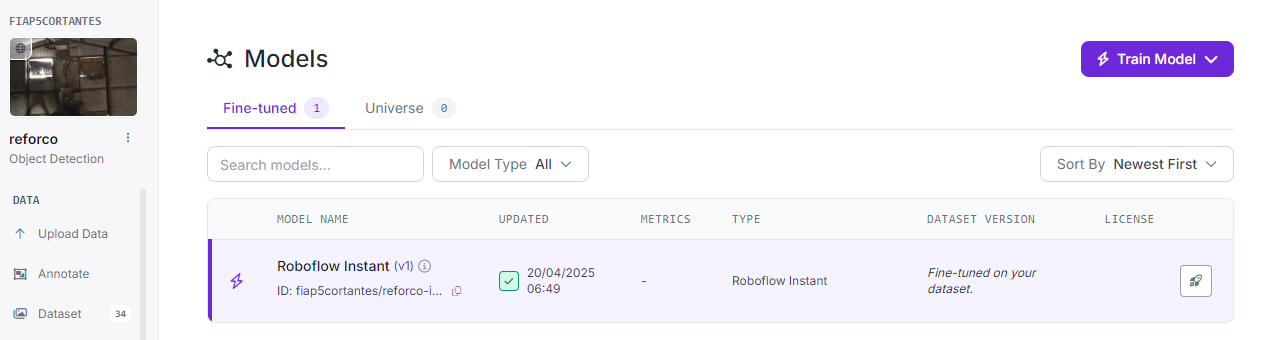

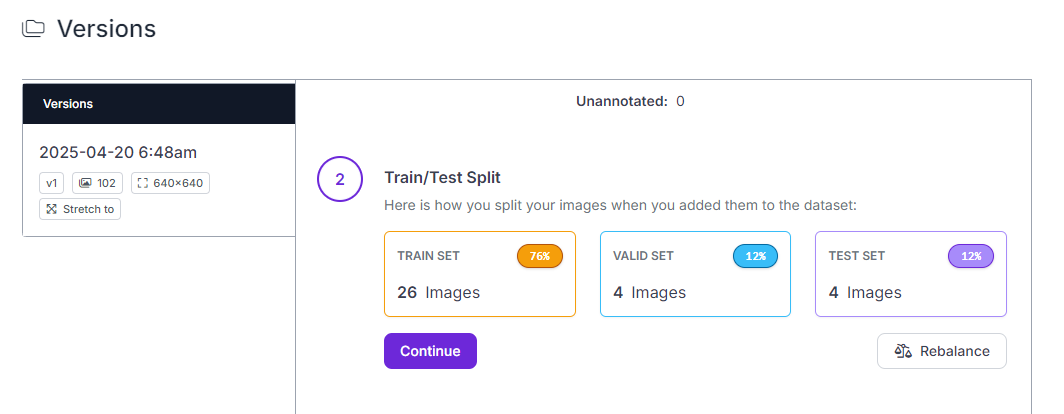

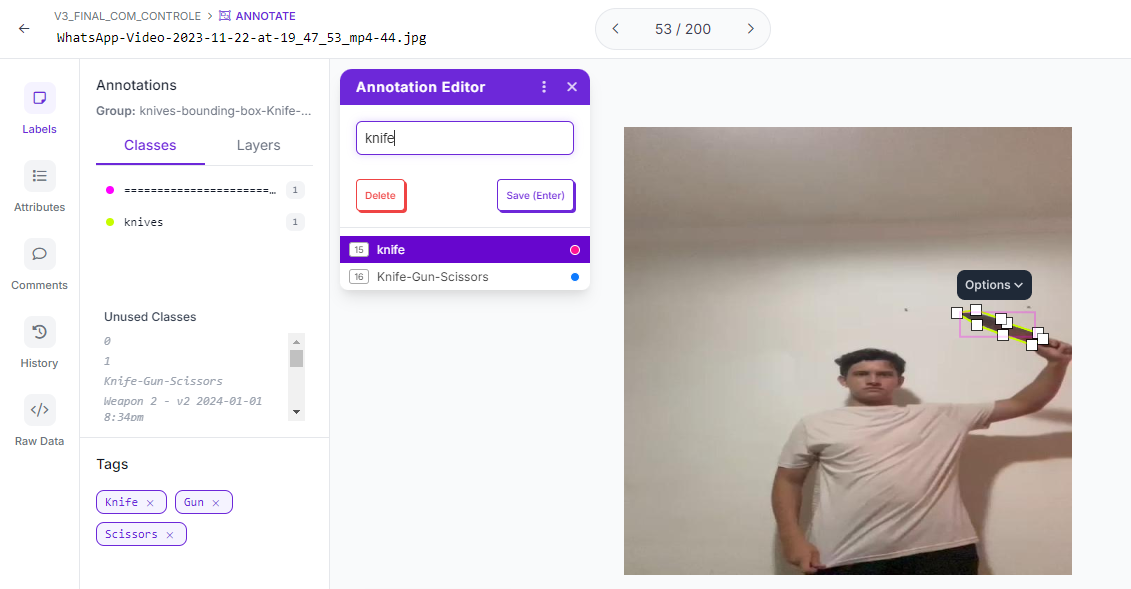

In [ ]:
#Etapa 3 – Treinamento do modelo YOLO no Colab com o dataset final unificado (v4) 🚀
from getpass import getpass
from roboflow import Roboflow

# 🔐 API segura
api_key = getpass("Digite sua Roboflow API Key: ")
rf = Roboflow(api_key=api_key)
workspace = rf.workspace()

print("Workspace detectado:", workspace.name)
print("\n🔍 Projetos válidos no seu workspace:\n")

# Usa método robusto e seguro
projects = []
try:
    for project_slug in workspace.list_projects():
        try:
            proj = workspace.project(project_slug)
            print(f"- Nome visível: {proj.name} | Slug: {proj.url}")
            projects.append(proj.url)
        except Exception as e:
            print(f"⚠️ Ignorado: {project_slug} → {str(e)}")
except Exception as e:
    print("Erro ao listar projetos:", str(e))

Digite sua Roboflow API Key: ··········
loading Roboflow workspace...
Workspace detectado: FIAP5Cortantes

🔍 Projetos válidos no seu workspace:

[{'id': 'fiap5cortantes/controle-scwxf', 'type': 'object-detection', 'name': 'Controle', 'created': 1661384141.107, 'updated': 1745063217.978, 'images': 1439, 'unannotated': 0, 'annotation': 'violence-controle-anythings-DaSu-face-human', 'versions': 1, 'public': True, 'multilabel': False, 'license': 'CC BY 4.0', 'splits': {'train': 1000, 'valid': 258, 'test': 181}, 'colors': {'0': '#C7FC00', '1': '#FF00FF', 'banana': '#00FFCE', 'plum': '#dc143c', 'sponge': '#ffe4b5', 'glass': '#FFABAB', 'spatule': '#ff1493', 'chips_can': '#00B7EB', 'peach': '#483d8b', 'tools': '#C7FC00', 'coke_can': '#FF00FF', 'orange': '#808000', 'apple': '#FE0056', 'kitchen_tool': '#0000FF', 'mustard': '#a0522d', 'pear': '#8b008b', 'face': '#0E7AFE', 'soccer_ball': '#d8bfd8', 'chocolate_box': '#FFFF00', 'tennis_ball': '#deb887', 'person': '#ff4500', 'strawberries': '#db7093'

Configurando YOLOv8

In [ ]:
!pip install roboflow ultralytics  # Instala Roboflow e YOLOv8

from roboflow import Roboflow
rf = Roboflow(api_key="uK7BzFHdK5qilTZ5iQ1r")  # Substitua pela sua API key
project = rf.workspace("fiap5cortantes").project("cortantesmvp-xme9i")
version = project.version(2)
dataset = version.download("yolov8")  # Formato YOLOv8 padrão

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 838.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127


Extracting Dataset Version Zip to cortantesMVP-2 in yolov8:: 100%|██████████| 3502/3502 [00:00<00:00, 10030.51it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!cp -r /content/cortantesMVP-2 /content/drive/MyDrive/

^C


In [ ]:
import os
import yaml
from pathlib import Path

# 1. Carregar os nomes das classes do data.yaml
with open(f"{DATASET_DIR}/data.yaml") as f:
    data = yaml.safe_load(f)
    names = data['names']
print("🔍 Classes no dataset:", names)

# 2. Verificar distribuição de classes em todas as divisões
for split in ['train', 'valid', 'test']:
    print(f"\n📊 Verificando '{split}':")

    images_dir = f"{DATASET_DIR}/{split}/images"
    labels_dir = f"{DATASET_DIR}/{split}/labels"

    # Contador para todas as classes
    class_counts = {name: 0 for name in names}

    # Verificar cada arquivo de anotação
    for label_file in os.listdir(labels_dir):
        with open(f"{labels_dir}/{label_file}") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_name = names[class_id]
                class_counts[class_name] += 1

    # Mostrar resultados
    for class_name, count in class_counts.items():
        print(f"✅ {class_name}: {count} instâncias")

# 3. Verificação adicional para 'scissors'
scissors_in_val = any("scissors" in names for names in data['names'])
print("\n🔎 Tesouras no validação?", "SIM" if scissors_in_val else "NÃO")

🔍 Classes no dataset: ['Knife', 'cutter', 'knife', 'knives', 'scissor', 'scissors', 'sickle', 'weapon']

📊 Verificando 'train':
✅ Knife: 0 instâncias
✅ cutter: 946 instâncias
✅ knife: 652 instâncias
✅ knives: 0 instâncias
✅ scissor: 0 instâncias
✅ scissors: 214 instâncias
✅ sickle: 286 instâncias
✅ weapon: 2 instâncias

📊 Verificando 'valid':
✅ Knife: 0 instâncias
✅ cutter: 128 instâncias
✅ knife: 9 instâncias
✅ knives: 0 instâncias
✅ scissor: 0 instâncias
✅ scissors: 0 instâncias
✅ sickle: 57 instâncias
✅ weapon: 0 instâncias

📊 Verificando 'test':
✅ Knife: 49 instâncias
✅ cutter: 69 instâncias
✅ knife: 3 instâncias
✅ knives: 0 instâncias
✅ scissor: 0 instâncias
✅ scissors: 0 instâncias
✅ sickle: 0 instâncias
✅ weapon: 0 instâncias

🔎 Tesouras no validação? SIM


In [ ]:
# Script para unificar classes (execute antes do treino)
import os
from pathlib import Path

class_mapping = {
    'Knife': 'knife',
    'knives': 'knife',
    'scissor': 'scissors',

}

for split in ['train', 'valid', 'test']:
    label_dir = Path(f"{DATASET_DIR}/{split}/labels")
    for label_file in label_dir.glob('*.txt'):
        with open(label_file, 'r+') as f:
            lines = []
            for line in f:
                class_id, *coords = line.split()
                old_name = names[int(class_id)]
                new_name = class_mapping.get(old_name, old_name)
                new_id = names.index(new_name)
                lines.append(f"{new_id} {' '.join(coords)}\n")
            f.seek(0)
            f.writelines(lines)

###Treinamento do Modelo YOLO8

In [ ]:
# 1. Importações essenciais
from google.colab import drive
import torch
from ultralytics import YOLO
import os

# 2. Montar Google Drive
#drive.mount('/content/drive')

# 3. Definir caminhos
DRIVE_BASE = "/content/drive/MyDrive"
DATASET_DIR = f"{DRIVE_BASE}/cortantesMVP-2"
DATA_YAML = f"{DATASET_DIR}/data.yaml"

# 4. Verificar estrutura
print(f"✅ Dataset encontrado em: {DATASET_DIR}")
print("Conteúdo:", os.listdir(DATASET_DIR))
print("\nExemplo de imagens de treino:", os.listdir(f"{DATASET_DIR}/train/images")[:3])

# 5. Configurar dispositivo
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"\n🚀 Dispositivo selecionado: {device.upper()}")

# 6. Treinamento do modelo
model = YOLO('yolov8n.pt')  # Modelo pré-treinado

try:
    results = model.train(
        data=DATA_YAML,
        epochs=30,
        imgsz=640,
        batch=16,
        device=device,
        workers=2  # Reduza se ocorrerem erros de memória
    )
    print("\n✅ Treinamento concluído com sucesso!")

except Exception as e:
    print(f"\n❌ Erro durante o treinamento: {str(e)}")
    print("Dica: Reduza o batch size ou image size se faltar memória")

# 7. Salvar resultados
!mkdir -p "{DRIVE_BASE}/YOLOv8_results"
!cp -r "/content/runs" "{DRIVE_BASE}/YOLOv8_results"
print(f"\n📁 Resultados salvos em: {DRIVE_BASE}/YOLOv8_results")
print(f"✅ Resultados salvos em: {DRIVE_BASE}/YOLOv8_results")

✅ Dataset encontrado em: /content/drive/MyDrive/cortantesMVP-2
Conteúdo: ['README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'test', 'train', 'valid']

Exemplo de imagens de treino: ['cutter186_jpg.rf.78d0311377f825bbd036117729951590.jpg', 'cutter186_jpg.rf.93457e5647b7b94117fdda6b354831f8.jpg', 'cutter187_jpg.rf.09645ce482fe9d22c5c1044a3dff8616.jpg']

🚀 Dispositivo selecionado: CUDA
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/cortantesMVP-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_r


train: Scanning /content/drive/MyDrive/cortantesMVP-2/train/labels.cache... 1583 images, 4 backgrounds, 1 corrupt: 100%|██████████| 1584/1584 [00:00<?, ?it/s]

train: /content/drive/MyDrive/cortantesMVP-2/train/images/cutter311_jpg.rf.d72fe7b935753ca1387be58868d5781c.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/cortantesMVP-2/train/images/cutter311_jpg.rf.d72fe7b935753ca1387be58868d5781c.jpg'
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 224, len(boxes) = 2097. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


WARNING ⚠️ val: Slow image access detected (ping: 14.0±28.5 ms, read: 1.2±1.6 MB/s, size: 7.7 KB). Use local storage instead of remote/mounted storage for better performance. See https://docs.ultralytics.com/guides/model-training-tips/



val: Scanning /content/drive/MyDrive/cortantesMVP-2/valid/labels.cache... 127 images, 1 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       1/30      2.06G      1.058      3.673      1.481         42        640:   0%|          | 0/99 [00:00<?, ?it/s]
       1/30      2.06G      1.058      3.673      1.481         42        640:   1%|          | 1/99 [00:00<00:22,  4.30it/s]
       1/30      2.06G      1.225      3.816      1.561         42        640:   1%|          | 1/99 [00:00<00:22,  4.30it/s]
       1/30      2.06G      1.225      3.816      1.561         42        640:   2%|▏         | 2/99 [00:00<00:29,  3.31it/s]
       1/30      2.06G      1.242      3.827      1.531         54        640:   2%|▏         | 2/99 [00:00<00:29,  3.31it/s]
       1/30      2.06G      1.242      3.827      1.531         54        640:   3%|▎         | 3/99 [00:00<00:31,  3.00it/s]
       1/30      2.12G      1.281      3.856      1.542         48        640:   3%|▎         | 3/99 [00:01<00:31,  3.00it/s]
       1/30      2.12G      1.281      3.856      1.542         48        640:   4%|▍ 

                   all        127        194      0.574      0.435      0.501      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       2/30      2.61G      1.247      2.238      1.547         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
       2/30      2.61G      1.247      2.238      1.547         47        640:   1%|          | 1/99 [00:00<01:26,  1.14it/s]
       2/30      2.61G      1.321      2.168      1.556         70        640:   1%|          | 1/99 [00:01<01:26,  1.14it/s]
       2/30      2.61G      1.321      2.168      1.556         70        640:   2%|▏         | 2/99 [00:01<00:44,  2.19it/s]
       2/30      2.61G      1.265      2.241      1.519         42        640:   2%|▏         | 2/99 [00:01<00:44,  2.19it/s]
       2/30      2.61G      1.265      2.241      1.519         42        640:   3%|▎         | 3/99 [00:01<00:35,  2.71it/s]
       2/30      2.61G      1.271      2.223      1.519         59        640:   3%|▎         | 3/99 [00:01<00:35,  2.71it/s]
       2/30      2.61G      1.271      2.223      1.519         59        640:   4%|▍ 

                   all        127        194      0.441      0.568      0.485      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       3/30      2.61G      1.241      2.133      1.411         49        640:   0%|          | 0/99 [00:00<?, ?it/s]
       3/30      2.61G      1.241      2.133      1.411         49        640:   1%|          | 1/99 [00:00<00:17,  5.57it/s]
       3/30      2.61G      1.261       2.12      1.511         46        640:   1%|          | 1/99 [00:00<00:17,  5.57it/s]
       3/30      2.61G      1.261       2.12      1.511         46        640:   2%|▏         | 2/99 [00:00<00:17,  5.55it/s]
       3/30      2.61G      1.242      2.076      1.512         45        640:   2%|▏         | 2/99 [00:00<00:17,  5.55it/s]
       3/30      2.61G      1.242      2.076      1.512         45        640:   3%|▎         | 3/99 [00:00<00:18,  5.27it/s]
       3/30      2.61G      1.245      2.031       1.52         54        640:   3%|▎         | 3/99 [00:00<00:18,  5.27it/s]
       3/30      2.61G      1.245      2.031       1.52         54        640:   4%|▍ 

                   all        127        194      0.394      0.503      0.442      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       4/30      2.61G      1.158      1.753      1.568         46        640:   0%|          | 0/99 [00:00<?, ?it/s]
       4/30      2.61G      1.158      1.753      1.568         46        640:   1%|          | 1/99 [00:00<00:17,  5.58it/s]
       4/30      2.61G      1.324      1.965      1.596         51        640:   1%|          | 1/99 [00:00<00:17,  5.58it/s]
       4/30      2.61G      1.324      1.965      1.596         51        640:   2%|▏         | 2/99 [00:00<00:24,  4.03it/s]
       4/30      2.61G      1.359      2.075      1.637         34        640:   2%|▏         | 2/99 [00:00<00:24,  4.03it/s]
       4/30      2.61G      1.359      2.075      1.637         34        640:   3%|▎         | 3/99 [00:00<00:26,  3.68it/s]
       4/30      2.61G      1.352      2.046      1.637         57        640:   3%|▎         | 3/99 [00:01<00:26,  3.68it/s]
       4/30      2.61G      1.352      2.046      1.637         57        640:   4%|▍ 

                   all        127        194       0.46      0.453      0.437       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       5/30      2.61G      1.138       1.65      1.535         39        640:   0%|          | 0/99 [00:00<?, ?it/s]
       5/30      2.61G      1.138       1.65      1.535         39        640:   1%|          | 1/99 [00:00<00:15,  6.48it/s]
       5/30      2.61G       1.14      1.765      1.496         45        640:   1%|          | 1/99 [00:00<00:15,  6.48it/s]
       5/30      2.61G       1.14      1.765      1.496         45        640:   2%|▏         | 2/99 [00:00<00:15,  6.22it/s]
       5/30      2.61G      1.225      1.837      1.517         64        640:   2%|▏         | 2/99 [00:00<00:15,  6.22it/s]
       5/30      2.61G      1.225      1.837      1.517         64        640:   3%|▎         | 3/99 [00:00<00:18,  5.21it/s]
       5/30      2.61G      1.219      1.808      1.522         39        640:   3%|▎         | 3/99 [00:00<00:18,  5.21it/s]
       5/30      2.61G      1.219      1.808      1.522         39        640:   4%|▍ 

                   all        127        194      0.527      0.633      0.558      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       6/30      2.61G      1.194      1.583      1.483         32        640:   0%|          | 0/99 [00:00<?, ?it/s]
       6/30      2.61G      1.194      1.583      1.483         32        640:   1%|          | 1/99 [00:00<00:17,  5.57it/s]
       6/30      2.61G      1.277      1.581      1.534         45        640:   1%|          | 1/99 [00:00<00:17,  5.57it/s]
       6/30      2.61G      1.277      1.581      1.534         45        640:   2%|▏         | 2/99 [00:00<00:20,  4.83it/s]
       6/30      2.61G      1.298      1.683       1.54         58        640:   2%|▏         | 2/99 [00:00<00:20,  4.83it/s]
       6/30      2.61G      1.298      1.683       1.54         58        640:   3%|▎         | 3/99 [00:00<00:22,  4.30it/s]
       6/30      2.61G      1.278      1.756      1.544         41        640:   3%|▎         | 3/99 [00:01<00:22,  4.30it/s]
       6/30      2.61G      1.278      1.756      1.544         41        640:   4%|▍ 

                   all        127        194      0.646      0.638      0.703      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       7/30      2.61G       1.47      1.925      1.748         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
       7/30      2.61G       1.47      1.925      1.748         44        640:   1%|          | 1/99 [00:00<00:18,  5.44it/s]
       7/30      2.61G      1.424      1.779      1.677         61        640:   1%|          | 1/99 [00:00<00:18,  5.44it/s]
       7/30      2.61G      1.424      1.779      1.677         61        640:   2%|▏         | 2/99 [00:00<00:17,  5.70it/s]
       7/30      2.61G      1.322      1.756      1.609         49        640:   2%|▏         | 2/99 [00:00<00:17,  5.70it/s]
       7/30      2.61G      1.322      1.756      1.609         49        640:   3%|▎         | 3/99 [00:00<00:18,  5.31it/s]
       7/30      2.61G      1.319      1.683      1.557         61        640:   3%|▎         | 3/99 [00:00<00:18,  5.31it/s]
       7/30      2.61G      1.319      1.683      1.557         61        640:   4%|▍ 

                   all        127        194      0.612      0.596      0.615      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       8/30      2.61G      1.308      1.607      1.525         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
       8/30      2.61G      1.308      1.607      1.525         51        640:   1%|          | 1/99 [00:00<00:16,  5.98it/s]
       8/30      2.61G      1.231      1.583      1.485         46        640:   1%|          | 1/99 [00:00<00:16,  5.98it/s]
       8/30      2.61G      1.231      1.583      1.485         46        640:   2%|▏         | 2/99 [00:00<00:20,  4.75it/s]
       8/30      2.61G      1.175      1.552      1.444         50        640:   2%|▏         | 2/99 [00:00<00:20,  4.75it/s]
       8/30      2.61G      1.175      1.552      1.444         50        640:   3%|▎         | 3/99 [00:00<00:21,  4.51it/s]
       8/30      2.61G      1.148      1.562      1.455         42        640:   3%|▎         | 3/99 [00:00<00:21,  4.51it/s]
       8/30      2.61G      1.148      1.562      1.455         42        640:   4%|▍ 

                   all        127        194      0.592      0.649      0.632       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       9/30      2.61G     0.9895      1.168      1.442         39        640:   0%|          | 0/99 [00:00<?, ?it/s]
       9/30      2.61G     0.9895      1.168      1.442         39        640:   1%|          | 1/99 [00:00<00:15,  6.31it/s]
       9/30      2.61G      1.044      1.247      1.432         59        640:   1%|          | 1/99 [00:00<00:15,  6.31it/s]
       9/30      2.61G      1.044      1.247      1.432         59        640:   2%|▏         | 2/99 [00:00<00:17,  5.64it/s]
       9/30      2.61G      1.038      1.353      1.402         55        640:   2%|▏         | 2/99 [00:00<00:17,  5.64it/s]
       9/30      2.61G      1.038      1.353      1.402         55        640:   3%|▎         | 3/99 [00:00<00:23,  4.15it/s]
       9/30      2.61G      1.007      1.318      1.388         42        640:   3%|▎         | 3/99 [00:00<00:23,  4.15it/s]
       9/30      2.61G      1.007      1.318      1.388         42        640:   4%|▍ 

                   all        127        194      0.841      0.665      0.752      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      10/30      2.61G      1.401      1.722      1.766         31        640:   0%|          | 0/99 [00:00<?, ?it/s]
      10/30      2.61G      1.401      1.722      1.766         31        640:   1%|          | 1/99 [00:00<00:15,  6.19it/s]
      10/30      2.61G      1.422       1.78      1.698         39        640:   1%|          | 1/99 [00:00<00:15,  6.19it/s]
      10/30      2.61G      1.422       1.78      1.698         39        640:   2%|▏         | 2/99 [00:00<00:16,  5.85it/s]
      10/30      2.61G      1.299      1.653      1.617         42        640:   2%|▏         | 2/99 [00:00<00:16,  5.85it/s]
      10/30      2.61G      1.299      1.653      1.617         42        640:   3%|▎         | 3/99 [00:00<00:18,  5.31it/s]
      10/30      2.61G      1.252      1.576      1.581         42        640:   3%|▎         | 3/99 [00:00<00:18,  5.31it/s]
      10/30      2.61G      1.252      1.576      1.581         42        640:   4%|▍ 

                   all        127        194       0.58      0.709      0.626      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      11/30      2.61G      1.137      1.553      1.509         36        640:   0%|          | 0/99 [00:00<?, ?it/s]
      11/30      2.61G      1.137      1.553      1.509         36        640:   1%|          | 1/99 [00:00<00:17,  5.51it/s]
      11/30      2.61G       1.19      1.508      1.558         50        640:   1%|          | 1/99 [00:00<00:17,  5.51it/s]
      11/30      2.61G       1.19      1.508      1.558         50        640:   2%|▏         | 2/99 [00:00<00:20,  4.82it/s]
      11/30      2.61G       1.13      1.381      1.488         46        640:   2%|▏         | 2/99 [00:00<00:20,  4.82it/s]
      11/30      2.61G       1.13      1.381      1.488         46        640:   3%|▎         | 3/99 [00:00<00:19,  4.82it/s]
      11/30      2.61G      1.151      1.381      1.497         45        640:   3%|▎         | 3/99 [00:00<00:19,  4.82it/s]
      11/30      2.61G      1.151      1.381      1.497         45        640:   4%|▍ 

                   all        127        194      0.624      0.714      0.698       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      12/30      2.62G      1.208      1.309      1.421         40        640:   0%|          | 0/99 [00:00<?, ?it/s]
      12/30      2.62G      1.208      1.309      1.421         40        640:   1%|          | 1/99 [00:00<00:20,  4.71it/s]
      12/30      2.63G      1.195      1.258      1.448         47        640:   1%|          | 1/99 [00:00<00:20,  4.71it/s]
      12/30      2.63G      1.195      1.258      1.448         47        640:   2%|▏         | 2/99 [00:00<00:27,  3.51it/s]
      12/30      2.63G      1.162      1.236      1.401         59        640:   2%|▏         | 2/99 [00:00<00:27,  3.51it/s]
      12/30      2.63G      1.162      1.236      1.401         59        640:   3%|▎         | 3/99 [00:00<00:27,  3.51it/s]
      12/30      2.63G      1.135      1.209      1.417         42        640:   3%|▎         | 3/99 [00:01<00:27,  3.51it/s]
      12/30      2.63G      1.135      1.209      1.417         42        640:   4%|▍ 

                   all        127        194      0.836      0.685      0.763      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      13/30      2.63G      1.069       1.07      1.362         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
      13/30      2.63G      1.069       1.07      1.362         44        640:   1%|          | 1/99 [00:00<00:16,  5.88it/s]
      13/30      2.63G      1.092      1.089      1.363         51        640:   1%|          | 1/99 [00:00<00:16,  5.88it/s]
      13/30      2.63G      1.092      1.089      1.363         51        640:   2%|▏         | 2/99 [00:00<00:17,  5.66it/s]
      13/30      2.63G      1.128      1.148      1.398         52        640:   2%|▏         | 2/99 [00:00<00:17,  5.66it/s]
      13/30      2.63G      1.128      1.148      1.398         52        640:   3%|▎         | 3/99 [00:00<00:19,  4.85it/s]
      13/30      2.63G      1.135      1.192       1.41         50        640:   3%|▎         | 3/99 [00:00<00:19,  4.85it/s]
      13/30      2.63G      1.135      1.192       1.41         50        640:   4%|▍ 

                   all        127        194      0.723      0.886      0.773       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      14/30      2.63G     0.9835      1.032      1.396         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
      14/30      2.63G     0.9835      1.032      1.396         44        640:   1%|          | 1/99 [00:00<00:23,  4.17it/s]
      14/30      2.63G       1.01      1.035      1.386         45        640:   1%|          | 1/99 [00:00<00:23,  4.17it/s]
      14/30      2.63G       1.01      1.035      1.386         45        640:   2%|▏         | 2/99 [00:00<00:25,  3.87it/s]
      14/30      2.63G      1.048      1.061      1.422         40        640:   2%|▏         | 2/99 [00:00<00:25,  3.87it/s]
      14/30      2.63G      1.048      1.061      1.422         40        640:   3%|▎         | 3/99 [00:00<00:23,  4.15it/s]
      14/30      2.63G      1.069      1.081      1.448         37        640:   3%|▎         | 3/99 [00:01<00:23,  4.15it/s]
      14/30      2.63G      1.069      1.081      1.448         37        640:   4%|▍ 

                   all        127        194      0.738      0.809      0.818      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      15/30      2.64G      1.043      1.175      1.363         54        640:   0%|          | 0/99 [00:00<?, ?it/s]
      15/30      2.64G      1.043      1.175      1.363         54        640:   1%|          | 1/99 [00:00<00:18,  5.22it/s]
      15/30      2.64G       1.08      1.224      1.364         49        640:   1%|          | 1/99 [00:00<00:18,  5.22it/s]
      15/30      2.64G       1.08      1.224      1.364         49        640:   2%|▏         | 2/99 [00:00<00:19,  5.08it/s]
      15/30      2.64G      1.079      1.255      1.419         34        640:   2%|▏         | 2/99 [00:00<00:19,  5.08it/s]
      15/30      2.64G      1.079      1.255      1.419         34        640:   3%|▎         | 3/99 [00:00<00:19,  4.90it/s]
      15/30      2.64G      1.074      1.216       1.43         50        640:   3%|▎         | 3/99 [00:00<00:19,  4.90it/s]
      15/30      2.64G      1.074      1.216       1.43         50        640:   4%|▍ 

                   all        127        194      0.854      0.806      0.865      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      16/30      2.64G     0.9917      1.111      1.329         41        640:   0%|          | 0/99 [00:00<?, ?it/s]
      16/30      2.64G     0.9917      1.111      1.329         41        640:   1%|          | 1/99 [00:00<00:16,  6.10it/s]
      16/30      2.64G     0.9921      1.147      1.321         47        640:   1%|          | 1/99 [00:00<00:16,  6.10it/s]
      16/30      2.64G     0.9921      1.147      1.321         47        640:   2%|▏         | 2/99 [00:00<00:21,  4.41it/s]
      16/30      2.64G     0.9977       1.11      1.341         40        640:   2%|▏         | 2/99 [00:00<00:21,  4.41it/s]
      16/30      2.64G     0.9977       1.11      1.341         40        640:   3%|▎         | 3/99 [00:00<00:19,  5.02it/s]
      16/30      2.64G      1.053      1.114      1.355         55        640:   3%|▎         | 3/99 [00:00<00:19,  5.02it/s]
      16/30      2.64G      1.053      1.114      1.355         55        640:   4%|▍ 

                   all        127        194      0.794      0.864      0.865       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      17/30      2.64G       1.06       1.03      1.281         60        640:   0%|          | 0/99 [00:00<?, ?it/s]
      17/30      2.64G       1.06       1.03      1.281         60        640:   1%|          | 1/99 [00:00<00:14,  6.66it/s]
      17/30      2.64G      1.047      1.244      1.345         47        640:   1%|          | 1/99 [00:00<00:14,  6.66it/s]
      17/30      2.64G      1.047      1.244      1.345         47        640:   2%|▏         | 2/99 [00:00<00:20,  4.84it/s]
      17/30      2.64G      1.035      1.215      1.354         47        640:   2%|▏         | 2/99 [00:00<00:20,  4.84it/s]
      17/30      2.64G      1.035      1.215      1.354         47        640:   3%|▎         | 3/99 [00:00<00:24,  3.94it/s]
      17/30      2.64G      1.013      1.177      1.339         54        640:   3%|▎         | 3/99 [00:00<00:24,  3.94it/s]
      17/30      2.64G      1.013      1.177      1.339         54        640:   4%|▍ 

                   all        127        194      0.853      0.739      0.802      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      18/30      2.65G      1.017     0.9575      1.295         61        640:   0%|          | 0/99 [00:00<?, ?it/s]
      18/30      2.65G      1.017     0.9575      1.295         61        640:   1%|          | 1/99 [00:00<00:16,  5.77it/s]
      18/30      2.66G      1.045      1.002      1.307         40        640:   1%|          | 1/99 [00:00<00:16,  5.77it/s]
      18/30      2.66G      1.045      1.002      1.307         40        640:   2%|▏         | 2/99 [00:00<00:20,  4.74it/s]
      18/30      2.66G      1.035      1.034      1.317         48        640:   2%|▏         | 2/99 [00:00<00:20,  4.74it/s]
      18/30      2.66G      1.035      1.034      1.317         48        640:   3%|▎         | 3/99 [00:00<00:18,  5.11it/s]
      18/30      2.66G      1.031       1.06      1.351         37        640:   3%|▎         | 3/99 [00:00<00:18,  5.11it/s]
      18/30      2.66G      1.031       1.06      1.351         37        640:   4%|▍ 

                   all        127        194       0.76       0.76      0.786      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      19/30      2.66G     0.9876      1.049      1.351         39        640:   0%|          | 0/99 [00:00<?, ?it/s]
      19/30      2.66G     0.9876      1.049      1.351         39        640:   1%|          | 1/99 [00:00<00:30,  3.20it/s]
      19/30      2.66G     0.9994      1.094      1.374         61        640:   1%|          | 1/99 [00:00<00:30,  3.20it/s]
      19/30      2.66G     0.9994      1.094      1.374         61        640:   2%|▏         | 2/99 [00:00<00:31,  3.11it/s]
      19/30      2.66G      1.026      1.137       1.35         44        640:   2%|▏         | 2/99 [00:00<00:31,  3.11it/s]
      19/30      2.66G      1.026      1.137       1.35         44        640:   3%|▎         | 3/99 [00:00<00:27,  3.52it/s]
      19/30      2.66G       1.05      1.117      1.354         54        640:   3%|▎         | 3/99 [00:01<00:27,  3.52it/s]
      19/30      2.66G       1.05      1.117      1.354         54        640:   4%|▍ 

                   all        127        194      0.819      0.761      0.774      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      20/30      2.66G     0.9227      0.961       1.21         59        640:   0%|          | 0/99 [00:00<?, ?it/s]
      20/30      2.66G     0.9227      0.961       1.21         59        640:   1%|          | 1/99 [00:00<00:16,  5.91it/s]
      20/30      2.66G     0.9987      1.007      1.319         53        640:   1%|          | 1/99 [00:00<00:16,  5.91it/s]
      20/30      2.66G     0.9987      1.007      1.319         53        640:   2%|▏         | 2/99 [00:00<00:20,  4.84it/s]
      20/30      2.66G      1.012      1.006      1.317         46        640:   2%|▏         | 2/99 [00:00<00:20,  4.84it/s]
      20/30      2.66G      1.012      1.006      1.317         46        640:   3%|▎         | 3/99 [00:00<00:21,  4.41it/s]
      20/30      2.66G     0.9842     0.9922      1.296         69        640:   3%|▎         | 3/99 [00:00<00:21,  4.41it/s]
      20/30      2.66G     0.9842     0.9922      1.296         69        640:   4%|▍ 

                   all        127        194      0.821      0.826      0.817      0.521


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      21/30      2.66G     0.9415     0.9374      1.393         18        640:   0%|          | 0/99 [00:00<?, ?it/s]
      21/30      2.66G     0.9415     0.9374      1.393         18        640:   1%|          | 1/99 [00:00<00:54,  1.80it/s]
      21/30      2.66G     0.9696     0.8599      1.382         24        640:   1%|          | 1/99 [00:00<00:54,  1.80it/s]
      21/30      2.66G     0.9696     0.8599      1.382         24        640:   2%|▏         | 2/99 [00:00<00:39,  2.47it/s]
      21/30      2.66G     0.8821     0.8454      1.295         26        640:   2%|▏         | 2/99 [00:01<00:39,  2.47it/s]
      21/30      2.66G     0.8821     0.8454      1.295         26        640:   3%|▎         | 3/99 [00:01<00:53,  1.79it/s]
      21/30      2.66G     0.8468     0.8746      1.269         20        640:   3%|▎         | 3/99 [00:01<00:53,  1.79it/s]
      21/30      2.66G     0.8468     0.8746      1.269         20        640:   4%|▍ 

                   all        127        194      0.843      0.823      0.863      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      22/30      2.66G     0.9997     0.6813      1.481         22        640:   0%|          | 0/99 [00:00<?, ?it/s]
      22/30      2.66G     0.9997     0.6813      1.481         22        640:   1%|          | 1/99 [00:00<00:17,  5.62it/s]
      22/30      2.66G     0.9736     0.7296      1.385         21        640:   1%|          | 1/99 [00:00<00:17,  5.62it/s]
      22/30      2.66G     0.9736     0.7296      1.385         21        640:   2%|▏         | 2/99 [00:00<00:19,  4.97it/s]
      22/30      2.66G     0.9437     0.7663      1.385         21        640:   2%|▏         | 2/99 [00:00<00:19,  4.97it/s]
      22/30      2.66G     0.9437     0.7663      1.385         21        640:   3%|▎         | 3/99 [00:00<00:19,  4.93it/s]
      22/30      2.66G     0.9644     0.8386      1.391         20        640:   3%|▎         | 3/99 [00:00<00:19,  4.93it/s]
      22/30      2.66G     0.9644     0.8386      1.391         20        640:   4%|▍ 

                   all        127        194      0.806      0.913      0.878      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      23/30      2.66G     0.8143        0.7      1.187         25        640:   0%|          | 0/99 [00:00<?, ?it/s]
      23/30      2.66G     0.8143        0.7      1.187         25        640:   1%|          | 1/99 [00:00<00:20,  4.69it/s]
      23/30      2.66G     0.8278     0.7254       1.29         20        640:   1%|          | 1/99 [00:00<00:20,  4.69it/s]
      23/30      2.66G     0.8278     0.7254       1.29         20        640:   2%|▏         | 2/99 [00:00<00:19,  4.86it/s]
      23/30      2.66G     0.7529     0.6736      1.313         17        640:   2%|▏         | 2/99 [00:00<00:19,  4.86it/s]
      23/30      2.66G     0.7529     0.6736      1.313         17        640:   3%|▎         | 3/99 [00:00<00:20,  4.65it/s]
      23/30      2.66G     0.6912     0.6604      1.258         19        640:   3%|▎         | 3/99 [00:00<00:20,  4.65it/s]
      23/30      2.66G     0.6912     0.6604      1.258         19        640:   4%|▍ 

                   all        127        194      0.781      0.763      0.778      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      24/30      2.66G     0.7286     0.5872      1.205         20        640:   0%|          | 0/99 [00:00<?, ?it/s]
      24/30      2.66G     0.7286     0.5872      1.205         20        640:   1%|          | 1/99 [00:00<00:14,  6.75it/s]
      24/30      2.66G     0.7351     0.6234      1.273         18        640:   1%|          | 1/99 [00:00<00:14,  6.75it/s]
      24/30      2.66G     0.7351     0.6234      1.273         18        640:   2%|▏         | 2/99 [00:00<00:19,  4.87it/s]
      24/30      2.66G     0.7744      0.674      1.264         28        640:   2%|▏         | 2/99 [00:00<00:19,  4.87it/s]
      24/30      2.66G     0.7744      0.674      1.264         28        640:   3%|▎         | 3/99 [00:00<00:19,  4.90it/s]
      24/30      2.66G     0.7942     0.6819      1.318         23        640:   3%|▎         | 3/99 [00:00<00:19,  4.90it/s]
      24/30      2.66G     0.7942     0.6819      1.318         23        640:   4%|▍ 

                   all        127        194      0.802      0.784      0.791      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      25/30      2.66G     0.8172     0.5186       1.33         24        640:   0%|          | 0/99 [00:00<?, ?it/s]
      25/30      2.66G     0.8172     0.5186       1.33         24        640:   1%|          | 1/99 [00:00<00:17,  5.76it/s]
      25/30      2.66G     0.6958     0.5076      1.264         17        640:   1%|          | 1/99 [00:00<00:17,  5.76it/s]
      25/30      2.66G     0.6958     0.5076      1.264         17        640:   2%|▏         | 2/99 [00:00<00:19,  4.87it/s]
      25/30      2.66G     0.6694     0.6754      1.261         17        640:   2%|▏         | 2/99 [00:00<00:19,  4.87it/s]
      25/30      2.66G     0.6694     0.6754      1.261         17        640:   3%|▎         | 3/99 [00:00<00:20,  4.60it/s]
      25/30      2.66G     0.6908     0.6766      1.244         19        640:   3%|▎         | 3/99 [00:00<00:20,  4.60it/s]
      25/30      2.66G     0.6908     0.6766      1.244         19        640:   4%|▍ 

                   all        127        194      0.789      0.887       0.85      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      26/30      2.66G     0.7735     0.5764      1.198         17        640:   0%|          | 0/99 [00:00<?, ?it/s]
      26/30      2.66G     0.7735     0.5764      1.198         17        640:   1%|          | 1/99 [00:00<00:15,  6.37it/s]
      26/30      2.66G     0.7782     0.6052      1.183         21        640:   1%|          | 1/99 [00:00<00:15,  6.37it/s]
      26/30      2.66G     0.7782     0.6052      1.183         21        640:   2%|▏         | 2/99 [00:00<00:20,  4.63it/s]
      26/30      2.66G     0.7844     0.5936      1.196         19        640:   2%|▏         | 2/99 [00:00<00:20,  4.63it/s]
      26/30      2.66G     0.7844     0.5936      1.196         19        640:   3%|▎         | 3/99 [00:00<00:21,  4.37it/s]
      26/30      2.66G     0.7949     0.6627      1.245         20        640:   3%|▎         | 3/99 [00:00<00:21,  4.37it/s]
      26/30      2.66G     0.7949     0.6627      1.245         20        640:   4%|▍ 

                   all        127        194      0.817      0.748       0.81      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      27/30      2.66G     0.7473      0.696      1.404         21        640:   0%|          | 0/99 [00:00<?, ?it/s]
      27/30      2.66G     0.7473      0.696      1.404         21        640:   1%|          | 1/99 [00:00<00:19,  5.07it/s]
      27/30      2.66G     0.7002     0.6334      1.246         21        640:   1%|          | 1/99 [00:00<00:19,  5.07it/s]
      27/30      2.66G     0.7002     0.6334      1.246         21        640:   2%|▏         | 2/99 [00:00<00:17,  5.41it/s]
      27/30      2.66G     0.7503     0.6588      1.249         35        640:   2%|▏         | 2/99 [00:00<00:17,  5.41it/s]
      27/30      2.66G     0.7503     0.6588      1.249         35        640:   3%|▎         | 3/99 [00:00<00:17,  5.46it/s]
      27/30      2.66G     0.7373      0.629      1.225         30        640:   3%|▎         | 3/99 [00:00<00:17,  5.46it/s]
      27/30      2.66G     0.7373      0.629      1.225         30        640:   4%|▍ 

                   all        127        194      0.891      0.826      0.877      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      28/30      2.66G      0.626     0.5973      1.127         19        640:   0%|          | 0/99 [00:00<?, ?it/s]
      28/30      2.66G      0.626     0.5973      1.127         19        640:   1%|          | 1/99 [00:00<00:15,  6.45it/s]
      28/30      2.66G     0.6841     0.5662      1.228         18        640:   1%|          | 1/99 [00:00<00:15,  6.45it/s]
      28/30      2.66G     0.6841     0.5662      1.228         18        640:   2%|▏         | 2/99 [00:00<00:19,  5.06it/s]
      28/30      2.66G     0.7374     0.6158      1.273         20        640:   2%|▏         | 2/99 [00:00<00:19,  5.06it/s]
      28/30      2.66G     0.7374     0.6158      1.273         20        640:   3%|▎         | 3/99 [00:00<00:21,  4.55it/s]
      28/30      2.66G     0.7143     0.6008      1.229         16        640:   3%|▎         | 3/99 [00:00<00:21,  4.55it/s]
      28/30      2.66G     0.7143     0.6008      1.229         16        640:   4%|▍ 

                   all        127        194      0.812      0.844      0.844      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      29/30      2.66G      0.666       0.68      1.163         17        640:   0%|          | 0/99 [00:00<?, ?it/s]
      29/30      2.66G      0.666       0.68      1.163         17        640:   1%|          | 1/99 [00:00<00:14,  6.62it/s]
      29/30      2.66G     0.6329     0.5724      1.179         18        640:   1%|          | 1/99 [00:00<00:14,  6.62it/s]
      29/30      2.66G     0.6329     0.5724      1.179         18        640:   2%|▏         | 2/99 [00:00<00:19,  5.02it/s]
      29/30      2.66G     0.6136     0.5324      1.199         17        640:   2%|▏         | 2/99 [00:00<00:19,  5.02it/s]
      29/30      2.66G     0.6136     0.5324      1.199         17        640:   3%|▎         | 3/99 [00:00<00:19,  4.90it/s]
      29/30      2.66G     0.6462     0.5291      1.249         19        640:   3%|▎         | 3/99 [00:00<00:19,  4.90it/s]
      29/30      2.66G     0.6462     0.5291      1.249         19        640:   4%|▍ 

                   all        127        194      0.825      0.802      0.847      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      30/30      2.66G     0.7444     0.7597      1.229         19        640:   0%|          | 0/99 [00:00<?, ?it/s]
      30/30      2.66G     0.7444     0.7597      1.229         19        640:   1%|          | 1/99 [00:00<00:16,  6.08it/s]
      30/30      2.66G     0.7244     0.6816      1.163         21        640:   1%|          | 1/99 [00:00<00:16,  6.08it/s]
      30/30      2.66G     0.7244     0.6816      1.163         21        640:   2%|▏         | 2/99 [00:00<00:17,  5.46it/s]
      30/30      2.66G     0.7153     0.6352      1.148         21        640:   2%|▏         | 2/99 [00:00<00:17,  5.46it/s]
      30/30      2.66G     0.7153     0.6352      1.148         21        640:   3%|▎         | 3/99 [00:00<00:20,  4.64it/s]
      30/30      2.66G     0.7101        0.6      1.109         28        640:   3%|▎         | 3/99 [00:00<00:20,  4.64it/s]
      30/30      2.66G     0.7101        0.6      1.109         28        640:   4%|▍ 

                   all        127        194      0.757      0.842      0.799      0.571



30 epochs completed in 0.308 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:01<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all        127        194      0.786      0.887       0.85      0.592
                cutter         71        128      0.869      0.884      0.916      0.665
                 knife          9          9      0.526      0.778      0.639      0.298
                sickle         46         57      0.963          1      0.994      0.813
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to runs/detect/train3

✅ Treinamento concluído com sucesso!

📁 Resultados salvos em: /content/drive/MyDrive/YOLOv8_results
✅ Resultados salvos em: /content/drive/MyDrive/YOLOv8_results


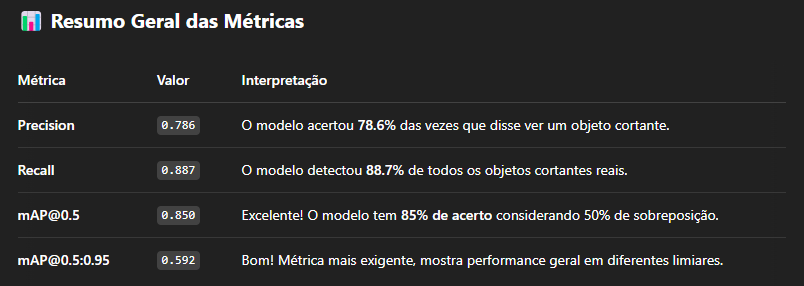

In [ ]:
 from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # Modelo mais preciso
model.train(
    data=f"{DATASET_DIR}/data.yaml",
    epochs=80,
    batch=16,
    imgsz=640,
    single_cls=False,  # Mantém multi-classes
    overlap_mask=True,
    optimizer='AdamW',
    lr0=0.001,
    patience=15
)


100%|██████████| 21.5M/21.5M [00:00<00:00, 356MB/s]


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/cortantesMVP-2/data.yaml, epochs=80, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b


train: Scanning /content/drive/MyDrive/cortantesMVP-2/train/labels.cache... 1583 images, 4 backgrounds, 1 corrupt: 100%|██████████| 1584/1584 [00:00<?, ?it/s]

train: /content/drive/MyDrive/cortantesMVP-2/train/images/cutter311_jpg.rf.d72fe7b935753ca1387be58868d5781c.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/cortantesMVP-2/train/images/cutter311_jpg.rf.d72fe7b935753ca1387be58868d5781c.jpg'
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 224, len(boxes) = 2097. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 7.0±9.1 ms, read: 1.6±3.0 MB/s, size: 7.7 KB)



val: Scanning /content/drive/MyDrive/cortantesMVP-2/valid/labels.cache... 127 images, 1 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       1/80       3.7G      1.335       11.3      1.648         42        640:   0%|          | 0/99 [00:00<?, ?it/s]
       1/80       3.7G      1.335       11.3      1.648         42        640:   1%|          | 1/99 [00:00<01:34,  1.03it/s]
       1/80       3.7G      1.427      11.45      1.701         42        640:   1%|          | 1/99 [00:01<01:34,  1.03it/s]
       1/80       3.7G      1.427      11.45      1.701         42        640:   2%|▏         | 2/99 [00:01<01:03,  1.53it/s]
       1/80       3.7G      1.427      10.99      1.657         54        640:   2%|▏         | 2/99 [00:01<01:03,  1.53it/s]
       1/80       3.7G      1.427      10.99      1.657         54        640:   3%|▎         | 3/99 [00:01<00:58,  1.64it/s]
       1/80       3.7G      1.468      11.11      1.683         48        640:   3%|▎         | 3/99 [00:02<00:58,  1.64it/s]
       1/80       3.7G      1.468      11.11      1.683         48        640:   4%|▍ 

                   all        127        194      0.329      0.378      0.376      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       2/80      4.53G      1.369      1.603      1.594         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
       2/80      4.53G      1.369      1.603      1.594         47        640:   1%|          | 1/99 [00:00<00:32,  3.06it/s]
       2/80      4.53G      1.462      1.696      1.604         70        640:   1%|          | 1/99 [00:00<00:32,  3.06it/s]
       2/80      4.53G      1.462      1.696      1.604         70        640:   2%|▏         | 2/99 [00:00<00:31,  3.05it/s]
       2/80      4.53G      1.422      1.665      1.622         42        640:   2%|▏         | 2/99 [00:01<00:31,  3.05it/s]
       2/80      4.53G      1.422      1.665      1.622         42        640:   3%|▎         | 3/99 [00:01<00:35,  2.67it/s]
       2/80      4.53G      1.441      1.694      1.626         59        640:   3%|▎         | 3/99 [00:01<00:35,  2.67it/s]
       2/80      4.53G      1.441      1.694      1.626         59        640:   4%|▍ 

                   all        127        194      0.413      0.551      0.506      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       3/80      4.53G      1.402      1.636      1.611         49        640:   0%|          | 0/99 [00:00<?, ?it/s]
       3/80      4.53G      1.402      1.636      1.611         49        640:   1%|          | 1/99 [00:00<00:27,  3.52it/s]
       3/80      4.53G      1.388      1.844      1.632         46        640:   1%|          | 1/99 [00:00<00:27,  3.52it/s]
       3/80      4.53G      1.388      1.844      1.632         46        640:   2%|▏         | 2/99 [00:00<00:28,  3.39it/s]
       3/80      4.53G      1.342      1.766       1.59         45        640:   2%|▏         | 2/99 [00:00<00:28,  3.39it/s]
       3/80      4.53G      1.342      1.766       1.59         45        640:   3%|▎         | 3/99 [00:00<00:28,  3.40it/s]
       3/80      4.53G      1.363      1.732      1.613         54        640:   3%|▎         | 3/99 [00:01<00:28,  3.40it/s]
       3/80      4.53G      1.363      1.732      1.613         54        640:   4%|▍ 

                   all        127        194      0.452      0.341       0.31      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       4/80      4.53G      1.241      1.588      1.628         46        640:   0%|          | 0/99 [00:00<?, ?it/s]
       4/80      4.53G      1.241      1.588      1.628         46        640:   1%|          | 1/99 [00:00<00:24,  3.96it/s]
       4/80      4.53G      1.432      1.796      1.705         51        640:   1%|          | 1/99 [00:00<00:24,  3.96it/s]
       4/80      4.53G      1.432      1.796      1.705         51        640:   2%|▏         | 2/99 [00:00<00:26,  3.60it/s]
       4/80      4.53G      1.395       1.85      1.683         34        640:   2%|▏         | 2/99 [00:00<00:26,  3.60it/s]
       4/80      4.53G      1.395       1.85      1.683         34        640:   3%|▎         | 3/99 [00:00<00:27,  3.49it/s]
       4/80      4.53G      1.406      1.827      1.683         57        640:   3%|▎         | 3/99 [00:01<00:27,  3.49it/s]
       4/80      4.53G      1.406      1.827      1.683         57        640:   4%|▍ 

                   all        127        194      0.475      0.464      0.429      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       5/80      4.53G      1.275      1.643      1.625         39        640:   0%|          | 0/99 [00:00<?, ?it/s]
       5/80      4.53G      1.275      1.643      1.625         39        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
       5/80      4.53G      1.315      1.703      1.634         45        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
       5/80      4.53G      1.315      1.703      1.634         45        640:   2%|▏         | 2/99 [00:00<00:28,  3.42it/s]
       5/80      4.53G      1.403      1.858      1.646         64        640:   2%|▏         | 2/99 [00:00<00:28,  3.42it/s]
       5/80      4.53G      1.403      1.858      1.646         64        640:   3%|▎         | 3/99 [00:00<00:30,  3.11it/s]
       5/80      4.53G      1.388      1.814      1.643         39        640:   3%|▎         | 3/99 [00:01<00:30,  3.11it/s]
       5/80      4.53G      1.388      1.814      1.643         39        640:   4%|▍ 

                   all        127        194      0.542      0.509      0.586      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       6/80      4.53G      1.451      1.863      1.662         32        640:   0%|          | 0/99 [00:00<?, ?it/s]
       6/80      4.53G      1.451      1.863      1.662         32        640:   1%|          | 1/99 [00:00<00:24,  3.97it/s]
       6/80      4.53G      1.458      1.727      1.703         45        640:   1%|          | 1/99 [00:00<00:24,  3.97it/s]
       6/80      4.53G      1.458      1.727      1.703         45        640:   2%|▏         | 2/99 [00:00<00:30,  3.18it/s]
       6/80      4.53G      1.471      1.793       1.69         58        640:   2%|▏         | 2/99 [00:00<00:30,  3.18it/s]
       6/80      4.53G      1.471      1.793       1.69         58        640:   3%|▎         | 3/99 [00:00<00:28,  3.38it/s]
       6/80      4.53G      1.412      1.788      1.664         41        640:   3%|▎         | 3/99 [00:01<00:28,  3.38it/s]
       6/80      4.53G      1.412      1.788      1.664         41        640:   4%|▍ 

                   all        127        194      0.596       0.68      0.638      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       7/80      4.53G      1.471      1.807      1.814         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
       7/80      4.53G      1.471      1.807      1.814         44        640:   1%|          | 1/99 [00:00<00:28,  3.49it/s]
       7/80      4.53G      1.477      1.749      1.783         61        640:   1%|          | 1/99 [00:00<00:28,  3.49it/s]
       7/80      4.53G      1.477      1.749      1.783         61        640:   2%|▏         | 2/99 [00:00<00:26,  3.69it/s]
       7/80      4.53G      1.421      1.723      1.724         49        640:   2%|▏         | 2/99 [00:00<00:26,  3.69it/s]
       7/80      4.53G      1.421      1.723      1.724         49        640:   3%|▎         | 3/99 [00:00<00:27,  3.50it/s]
       7/80      4.53G      1.415      1.662      1.677         61        640:   3%|▎         | 3/99 [00:01<00:27,  3.50it/s]
       7/80      4.53G      1.415      1.662      1.677         61        640:   4%|▍ 

                   all        127        194      0.507      0.431      0.526      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       8/80      4.53G      1.451      1.627      1.669         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
       8/80      4.53G      1.451      1.627      1.669         51        640:   1%|          | 1/99 [00:00<00:27,  3.60it/s]
       8/80      4.53G      1.378      1.558      1.608         46        640:   1%|          | 1/99 [00:00<00:27,  3.60it/s]
       8/80      4.53G      1.378      1.558      1.608         46        640:   2%|▏         | 2/99 [00:00<00:42,  2.29it/s]
       8/80      4.53G      1.354      1.595      1.599         50        640:   2%|▏         | 2/99 [00:01<00:42,  2.29it/s]
       8/80      4.53G      1.354      1.595      1.599         50        640:   3%|▎         | 3/99 [00:01<01:10,  1.35it/s]
       8/80      4.53G      1.336       1.65      1.616         42        640:   3%|▎         | 3/99 [00:02<01:10,  1.35it/s]
       8/80      4.53G      1.336       1.65      1.616         42        640:   4%|▍ 

                   all        127        194      0.542      0.633      0.618      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
       9/80      4.54G      1.205      1.281      1.661         39        640:   0%|          | 0/99 [00:00<?, ?it/s]
       9/80      4.54G      1.205      1.281      1.661         39        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
       9/80      4.54G      1.179      1.293      1.561         59        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
       9/80      4.54G      1.179      1.293      1.561         59        640:   2%|▏         | 2/99 [00:00<00:26,  3.65it/s]
       9/80      4.54G      1.245      1.462      1.579         55        640:   2%|▏         | 2/99 [00:00<00:26,  3.65it/s]
       9/80      4.54G      1.245      1.462      1.579         55        640:   3%|▎         | 3/99 [00:00<00:27,  3.55it/s]
       9/80      4.54G      1.194      1.402       1.53         42        640:   3%|▎         | 3/99 [00:01<00:27,  3.55it/s]
       9/80      4.54G      1.194      1.402       1.53         42        640:   4%|▍ 

                   all        127        194      0.796      0.696       0.74      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      10/80      4.54G      1.352      1.678      1.739         31        640:   0%|          | 0/99 [00:00<?, ?it/s]
      10/80      4.54G      1.352      1.678      1.739         31        640:   1%|          | 1/99 [00:00<00:24,  3.97it/s]
      10/80      4.54G      1.419      1.729      1.727         39        640:   1%|          | 1/99 [00:00<00:24,  3.97it/s]
      10/80      4.54G      1.419      1.729      1.727         39        640:   2%|▏         | 2/99 [00:00<00:24,  3.89it/s]
      10/80      4.54G      1.353      1.627      1.717         42        640:   2%|▏         | 2/99 [00:00<00:24,  3.89it/s]
      10/80      4.54G      1.353      1.627      1.717         42        640:   3%|▎         | 3/99 [00:00<00:26,  3.58it/s]
      10/80      4.54G      1.282       1.57       1.65         42        640:   3%|▎         | 3/99 [00:01<00:26,  3.58it/s]
      10/80      4.54G      1.282       1.57       1.65         42        640:   4%|▍ 

                   all        127        194      0.562      0.539      0.558      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      11/80      4.57G       1.24      1.527      1.619         36        640:   0%|          | 0/99 [00:00<?, ?it/s]
      11/80      4.57G       1.24      1.527      1.619         36        640:   1%|          | 1/99 [00:00<00:29,  3.36it/s]
      11/80      4.57G      1.312      1.598      1.624         50        640:   1%|          | 1/99 [00:00<00:29,  3.36it/s]
      11/80      4.57G      1.312      1.598      1.624         50        640:   2%|▏         | 2/99 [00:00<00:29,  3.27it/s]
      11/80      4.58G      1.253      1.483       1.58         46        640:   2%|▏         | 2/99 [00:00<00:29,  3.27it/s]
      11/80      4.58G      1.253      1.483       1.58         46        640:   3%|▎         | 3/99 [00:00<00:30,  3.16it/s]
      11/80      4.58G      1.271      1.449      1.594         45        640:   3%|▎         | 3/99 [00:01<00:30,  3.16it/s]
      11/80      4.58G      1.271      1.449      1.594         45        640:   4%|▍ 

                   all        127        194      0.907      0.614      0.746      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      12/80      4.61G      1.305       1.64      1.491         40        640:   0%|          | 0/99 [00:00<?, ?it/s]
      12/80      4.61G      1.305       1.64      1.491         40        640:   1%|          | 1/99 [00:00<00:25,  3.80it/s]
      12/80      4.61G      1.257      1.456      1.537         47        640:   1%|          | 1/99 [00:00<00:25,  3.80it/s]
      12/80      4.61G      1.257      1.456      1.537         47        640:   2%|▏         | 2/99 [00:00<00:27,  3.50it/s]
      12/80      4.61G      1.282      1.403      1.543         59        640:   2%|▏         | 2/99 [00:00<00:27,  3.50it/s]
      12/80      4.61G      1.282      1.403      1.543         59        640:   3%|▎         | 3/99 [00:00<00:27,  3.53it/s]
      12/80      4.61G      1.288      1.388      1.577         42        640:   3%|▎         | 3/99 [00:01<00:27,  3.53it/s]
      12/80      4.61G      1.288      1.388      1.577         42        640:   4%|▍ 

                   all        127        194      0.642      0.658      0.655       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      13/80      4.61G      1.149      1.058      1.486         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
      13/80      4.61G      1.149      1.058      1.486         44        640:   1%|          | 1/99 [00:00<00:26,  3.75it/s]
      13/80      4.61G      1.169      1.177      1.487         51        640:   1%|          | 1/99 [00:00<00:26,  3.75it/s]
      13/80      4.61G      1.169      1.177      1.487         51        640:   2%|▏         | 2/99 [00:00<00:25,  3.81it/s]
      13/80      4.61G      1.213      1.237      1.507         52        640:   2%|▏         | 2/99 [00:00<00:25,  3.81it/s]
      13/80      4.61G      1.213      1.237      1.507         52        640:   3%|▎         | 3/99 [00:00<00:28,  3.33it/s]
      13/80      4.61G      1.209       1.25      1.507         50        640:   3%|▎         | 3/99 [00:01<00:28,  3.33it/s]
      13/80      4.61G      1.209       1.25      1.507         50        640:   4%|▍ 

                   all        127        194      0.814      0.736      0.803      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      14/80      4.61G      1.162       1.14      1.454         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
      14/80      4.61G      1.162       1.14      1.454         44        640:   1%|          | 1/99 [00:00<00:24,  4.01it/s]
      14/80      4.61G      1.147      1.106      1.432         45        640:   1%|          | 1/99 [00:00<00:24,  4.01it/s]
      14/80      4.61G      1.147      1.106      1.432         45        640:   2%|▏         | 2/99 [00:00<00:26,  3.73it/s]
      14/80      4.61G      1.243      1.238      1.547         40        640:   2%|▏         | 2/99 [00:00<00:26,  3.73it/s]
      14/80      4.61G      1.243      1.238      1.547         40        640:   3%|▎         | 3/99 [00:00<00:27,  3.48it/s]
      14/80      4.61G      1.289      1.348       1.61         37        640:   3%|▎         | 3/99 [00:01<00:27,  3.48it/s]
      14/80      4.61G      1.289      1.348       1.61         37        640:   4%|▍ 

                   all        127        194      0.785      0.697      0.746      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      15/80      4.65G     0.9911      1.225      1.352         54        640:   0%|          | 0/99 [00:00<?, ?it/s]
      15/80      4.65G     0.9911      1.225      1.352         54        640:   1%|          | 1/99 [00:00<00:28,  3.38it/s]
      15/80      4.65G      1.128      1.301        1.4         49        640:   1%|          | 1/99 [00:00<00:28,  3.38it/s]
      15/80      4.65G      1.128      1.301        1.4         49        640:   2%|▏         | 2/99 [00:00<00:27,  3.53it/s]
      15/80      4.65G      1.147      1.296      1.463         34        640:   2%|▏         | 2/99 [00:00<00:27,  3.53it/s]
      15/80      4.65G      1.147      1.296      1.463         34        640:   3%|▎         | 3/99 [00:00<00:25,  3.71it/s]
      15/80      4.65G      1.128      1.237      1.456         50        640:   3%|▎         | 3/99 [00:01<00:25,  3.71it/s]
      15/80      4.65G      1.128      1.237      1.456         50        640:   4%|▍ 

                   all        127        194      0.718      0.784      0.791      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      16/80      4.65G      1.104      1.219      1.431         41        640:   0%|          | 0/99 [00:00<?, ?it/s]
      16/80      4.65G      1.104      1.219      1.431         41        640:   1%|          | 1/99 [00:00<00:25,  3.84it/s]
      16/80      4.65G       1.09      1.295      1.426         47        640:   1%|          | 1/99 [00:00<00:25,  3.84it/s]
      16/80      4.65G       1.09      1.295      1.426         47        640:   2%|▏         | 2/99 [00:00<00:29,  3.34it/s]
      16/80      4.65G       1.11      1.272      1.449         40        640:   2%|▏         | 2/99 [00:00<00:29,  3.34it/s]
      16/80      4.65G       1.11      1.272      1.449         40        640:   3%|▎         | 3/99 [00:00<00:27,  3.47it/s]
      16/80      4.65G      1.158      1.282      1.447         55        640:   3%|▎         | 3/99 [00:01<00:27,  3.47it/s]
      16/80      4.65G      1.158      1.282      1.447         55        640:   4%|▍ 

                   all        127        194      0.753      0.641      0.659      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      17/80      4.68G      1.178      1.187      1.458         60        640:   0%|          | 0/99 [00:00<?, ?it/s]
      17/80      4.68G      1.178      1.187      1.458         60        640:   1%|          | 1/99 [00:00<00:24,  3.98it/s]
      17/80      4.68G      1.239      1.442      1.545         47        640:   1%|          | 1/99 [00:00<00:24,  3.98it/s]
      17/80      4.68G      1.239      1.442      1.545         47        640:   2%|▏         | 2/99 [00:00<00:26,  3.70it/s]
      17/80      4.68G      1.195      1.404      1.531         47        640:   2%|▏         | 2/99 [00:00<00:26,  3.70it/s]
      17/80      4.68G      1.195      1.404      1.531         47        640:   3%|▎         | 3/99 [00:00<00:29,  3.24it/s]
      17/80      4.68G      1.206      1.376      1.509         54        640:   3%|▎         | 3/99 [00:01<00:29,  3.24it/s]
      17/80      4.68G      1.206      1.376      1.509         54        640:   4%|▍ 

                   all        127        194      0.769      0.715      0.748      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      18/80      4.69G      1.136      1.133      1.431         61        640:   0%|          | 0/99 [00:00<?, ?it/s]
      18/80      4.69G      1.136      1.133      1.431         61        640:   1%|          | 1/99 [00:00<00:24,  3.94it/s]
      18/80      4.69G       1.23      1.178      1.479         40        640:   1%|          | 1/99 [00:00<00:24,  3.94it/s]
      18/80      4.69G       1.23      1.178      1.479         40        640:   2%|▏         | 2/99 [00:00<00:25,  3.79it/s]
      18/80      4.69G      1.186      1.201       1.45         48        640:   2%|▏         | 2/99 [00:00<00:25,  3.79it/s]
      18/80      4.69G      1.186      1.201       1.45         48        640:   3%|▎         | 3/99 [00:00<00:29,  3.25it/s]
      18/80      4.69G      1.181      1.259      1.475         37        640:   3%|▎         | 3/99 [00:01<00:29,  3.25it/s]
      18/80      4.69G      1.181      1.259      1.475         37        640:   4%|▍ 

                   all        127        194      0.883      0.655      0.767      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      19/80      4.69G      1.079      1.417      1.435         39        640:   0%|          | 0/99 [00:00<?, ?it/s]
      19/80      4.69G      1.079      1.417      1.435         39        640:   1%|          | 1/99 [00:00<00:28,  3.38it/s]
      19/80      4.69G      1.159      1.341      1.511         61        640:   1%|          | 1/99 [00:00<00:28,  3.38it/s]
      19/80      4.69G      1.159      1.341      1.511         61        640:   2%|▏         | 2/99 [00:00<00:26,  3.67it/s]
      19/80      4.69G       1.17       1.35      1.479         44        640:   2%|▏         | 2/99 [00:00<00:26,  3.67it/s]
      19/80      4.69G       1.17       1.35      1.479         44        640:   3%|▎         | 3/99 [00:00<00:25,  3.75it/s]
      19/80      4.69G      1.227      1.325      1.508         54        640:   3%|▎         | 3/99 [00:01<00:25,  3.75it/s]
      19/80      4.69G      1.227      1.325      1.508         54        640:   4%|▍ 

                   all        127        194      0.849      0.708       0.79      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      20/80      4.69G      1.242      1.174      1.427         59        640:   0%|          | 0/99 [00:00<?, ?it/s]
      20/80      4.69G      1.242      1.174      1.427         59        640:   1%|          | 1/99 [00:00<00:25,  3.78it/s]
      20/80      4.69G      1.224      1.219      1.473         53        640:   1%|          | 1/99 [00:00<00:25,  3.78it/s]
      20/80      4.69G      1.224      1.219      1.473         53        640:   2%|▏         | 2/99 [00:00<00:29,  3.33it/s]
      20/80      4.69G      1.215      1.185      1.458         46        640:   2%|▏         | 2/99 [00:00<00:29,  3.33it/s]
      20/80      4.69G      1.215      1.185      1.458         46        640:   3%|▎         | 3/99 [00:00<00:28,  3.33it/s]
      20/80      4.69G      1.145      1.158      1.411         69        640:   3%|▎         | 3/99 [00:01<00:28,  3.33it/s]
      20/80      4.69G      1.145      1.158      1.411         69        640:   4%|▍ 

                   all        127        194      0.625      0.747      0.694      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      21/80      4.69G      1.092      1.208      1.394         48        640:   0%|          | 0/99 [00:00<?, ?it/s]
      21/80      4.69G      1.092      1.208      1.394         48        640:   1%|          | 1/99 [00:00<00:28,  3.46it/s]
      21/80      4.69G      1.222      1.393      1.479         63        640:   1%|          | 1/99 [00:00<00:28,  3.46it/s]
      21/80      4.69G      1.222      1.393      1.479         63        640:   2%|▏         | 2/99 [00:00<00:27,  3.47it/s]
      21/80      4.69G      1.151      1.337      1.426         45        640:   2%|▏         | 2/99 [00:00<00:27,  3.47it/s]
      21/80      4.69G      1.151      1.337      1.426         45        640:   3%|▎         | 3/99 [00:00<00:29,  3.23it/s]
      21/80      4.69G       1.19      1.351      1.458         42        640:   3%|▎         | 3/99 [00:01<00:29,  3.23it/s]
      21/80      4.69G       1.19      1.351      1.458         42        640:   4%|▍ 

                   all        127        194      0.847      0.698      0.751      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      22/80      4.69G      1.182      1.141      1.457         55        640:   0%|          | 0/99 [00:00<?, ?it/s]
      22/80      4.69G      1.182      1.141      1.457         55        640:   1%|          | 1/99 [00:00<00:24,  4.01it/s]
      22/80      4.69G      1.138      1.138      1.399         39        640:   1%|          | 1/99 [00:00<00:24,  4.01it/s]
      22/80      4.69G      1.138      1.138      1.399         39        640:   2%|▏         | 2/99 [00:00<00:26,  3.63it/s]
      22/80      4.69G      1.034      1.096      1.385         41        640:   2%|▏         | 2/99 [00:00<00:26,  3.63it/s]
      22/80      4.69G      1.034      1.096      1.385         41        640:   3%|▎         | 3/99 [00:00<00:26,  3.61it/s]
      22/80      4.69G      1.016      1.089      1.388         47        640:   3%|▎         | 3/99 [00:01<00:26,  3.61it/s]
      22/80      4.69G      1.016      1.089      1.388         47        640:   4%|▍ 

                   all        127        194      0.774      0.737      0.774      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      23/80      4.69G      1.191      1.114      1.376         50        640:   0%|          | 0/99 [00:00<?, ?it/s]
      23/80      4.69G      1.191      1.114      1.376         50        640:   1%|          | 1/99 [00:00<00:29,  3.27it/s]
      23/80      4.69G      1.131      1.165      1.393         44        640:   1%|          | 1/99 [00:00<00:29,  3.27it/s]
      23/80      4.69G      1.131      1.165      1.393         44        640:   2%|▏         | 2/99 [00:00<00:32,  3.02it/s]
      23/80      4.69G      1.088      1.109      1.372         48        640:   2%|▏         | 2/99 [00:01<00:32,  3.02it/s]
      23/80      4.69G      1.088      1.109      1.372         48        640:   3%|▎         | 3/99 [00:01<00:33,  2.87it/s]
      23/80      4.69G      1.052       1.08      1.336         53        640:   3%|▎         | 3/99 [00:01<00:33,  2.87it/s]
      23/80      4.69G      1.052       1.08      1.336         53        640:   4%|▍ 

                   all        127        194      0.808      0.734      0.795      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      24/80      4.69G      0.903      1.085       1.24         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
      24/80      4.69G      0.903      1.085       1.24         47        640:   1%|          | 1/99 [00:00<00:24,  4.01it/s]
      24/80      4.69G      1.027      1.109      1.404         34        640:   1%|          | 1/99 [00:00<00:24,  4.01it/s]
      24/80      4.69G      1.027      1.109      1.404         34        640:   2%|▏         | 2/99 [00:00<00:27,  3.49it/s]
      24/80      4.69G      1.079      1.173      1.418         47        640:   2%|▏         | 2/99 [00:00<00:27,  3.49it/s]
      24/80      4.69G      1.079      1.173      1.418         47        640:   3%|▎         | 3/99 [00:00<00:27,  3.44it/s]
      24/80      4.69G      1.056      1.158       1.42         41        640:   3%|▎         | 3/99 [00:01<00:27,  3.44it/s]
      24/80      4.69G      1.056      1.158       1.42         41        640:   4%|▍ 

                   all        127        194      0.728      0.717      0.679      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      25/80      4.69G      1.075      1.071      1.424         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
      25/80      4.69G      1.075      1.071      1.424         47        640:   1%|          | 1/99 [00:00<00:24,  3.99it/s]
      25/80      4.69G      1.029      1.028      1.419         33        640:   1%|          | 1/99 [00:00<00:24,  3.99it/s]
      25/80      4.69G      1.029      1.028      1.419         33        640:   2%|▏         | 2/99 [00:00<00:26,  3.73it/s]
      25/80      4.69G      1.002      1.007      1.387         38        640:   2%|▏         | 2/99 [00:00<00:26,  3.73it/s]
      25/80      4.69G      1.002      1.007      1.387         38        640:   3%|▎         | 3/99 [00:00<00:28,  3.36it/s]
      25/80      4.69G      1.012      1.027      1.383         45        640:   3%|▎         | 3/99 [00:01<00:28,  3.36it/s]
      25/80      4.69G      1.012      1.027      1.383         45        640:   4%|▍ 

                   all        127        194      0.699      0.767      0.757      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      26/80      4.69G      0.929     0.9718      1.229         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
      26/80      4.69G      0.929     0.9718      1.229         51        640:   1%|          | 1/99 [00:00<00:25,  3.86it/s]
      26/80      4.69G      1.055      1.038      1.329         47        640:   1%|          | 1/99 [00:00<00:25,  3.86it/s]
      26/80      4.69G      1.055      1.038      1.329         47        640:   2%|▏         | 2/99 [00:00<00:27,  3.57it/s]
      26/80      4.69G      1.002      1.012      1.297         42        640:   2%|▏         | 2/99 [00:00<00:27,  3.57it/s]
      26/80      4.69G      1.002      1.012      1.297         42        640:   3%|▎         | 3/99 [00:00<00:26,  3.62it/s]
      26/80      4.69G      1.025     0.9893      1.328         44        640:   3%|▎         | 3/99 [00:01<00:26,  3.62it/s]
      26/80      4.69G      1.025     0.9893      1.328         44        640:   4%|▍ 

                   all        127        194      0.785      0.829      0.806       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      27/80      4.69G      1.194      1.077      1.461         52        640:   0%|          | 0/99 [00:00<?, ?it/s]
      27/80      4.69G      1.194      1.077      1.461         52        640:   1%|          | 1/99 [00:00<00:36,  2.72it/s]
      27/80      4.69G      1.134      1.097      1.452         40        640:   1%|          | 1/99 [00:00<00:36,  2.72it/s]
      27/80      4.69G      1.134      1.097      1.452         40        640:   2%|▏         | 2/99 [00:00<00:35,  2.70it/s]
      27/80      4.69G      1.125      1.075      1.411         63        640:   2%|▏         | 2/99 [00:01<00:35,  2.70it/s]
      27/80      4.69G      1.125      1.075      1.411         63        640:   3%|▎         | 3/99 [00:01<00:36,  2.64it/s]
      27/80      4.69G      1.077       1.05      1.382         43        640:   3%|▎         | 3/99 [00:01<00:36,  2.64it/s]
      27/80      4.69G      1.077       1.05      1.382         43        640:   4%|▍ 

                   all        127        194      0.625      0.655      0.649      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      28/80      4.69G     0.8421     0.8677       1.25         56        640:   0%|          | 0/99 [00:00<?, ?it/s]
      28/80      4.69G     0.8421     0.8677       1.25         56        640:   1%|          | 1/99 [00:00<00:24,  3.97it/s]
      28/80      4.69G      0.954      1.016      1.348         37        640:   1%|          | 1/99 [00:00<00:24,  3.97it/s]
      28/80      4.69G      0.954      1.016      1.348         37        640:   2%|▏         | 2/99 [00:00<00:27,  3.56it/s]
      28/80      4.69G     0.9954     0.9883      1.348         49        640:   2%|▏         | 2/99 [00:00<00:27,  3.56it/s]
      28/80      4.69G     0.9954     0.9883      1.348         49        640:   3%|▎         | 3/99 [00:00<00:26,  3.59it/s]
      28/80      4.69G      1.022      1.008      1.371         40        640:   3%|▎         | 3/99 [00:01<00:26,  3.59it/s]
      28/80      4.69G      1.022      1.008      1.371         40        640:   4%|▍ 

                   all        127        194        0.8      0.746       0.79       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      29/80      4.69G     0.9177     0.8675      1.317         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
      29/80      4.69G     0.9177     0.8675      1.317         51        640:   1%|          | 1/99 [00:00<00:26,  3.64it/s]
      29/80      4.69G     0.9694     0.8818      1.329         45        640:   1%|          | 1/99 [00:00<00:26,  3.64it/s]
      29/80      4.69G     0.9694     0.8818      1.329         45        640:   2%|▏         | 2/99 [00:00<00:25,  3.80it/s]
      29/80      4.69G     0.9789     0.9039      1.335         50        640:   2%|▏         | 2/99 [00:00<00:25,  3.80it/s]
      29/80      4.69G     0.9789     0.9039      1.335         50        640:   3%|▎         | 3/99 [00:00<00:29,  3.21it/s]
      29/80      4.69G      1.004     0.9308      1.351         54        640:   3%|▎         | 3/99 [00:01<00:29,  3.21it/s]
      29/80      4.69G      1.004     0.9308      1.351         54        640:   4%|▍ 

                   all        127        194      0.812      0.809      0.833      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      30/80      4.69G     0.8498     0.7486      1.257         52        640:   0%|          | 0/99 [00:00<?, ?it/s]
      30/80      4.69G     0.8498     0.7486      1.257         52        640:   1%|          | 1/99 [00:00<00:25,  3.82it/s]
      30/80      4.69G      0.901     0.8141      1.312         50        640:   1%|          | 1/99 [00:00<00:25,  3.82it/s]
      30/80      4.69G      0.901     0.8141      1.312         50        640:   2%|▏         | 2/99 [00:00<00:27,  3.55it/s]
      30/80      4.69G      0.979     0.8807      1.344         44        640:   2%|▏         | 2/99 [00:00<00:27,  3.55it/s]
      30/80      4.69G      0.979     0.8807      1.344         44        640:   3%|▎         | 3/99 [00:00<00:27,  3.48it/s]
      30/80      4.69G      0.973     0.8801      1.345         49        640:   3%|▎         | 3/99 [00:01<00:27,  3.48it/s]
      30/80      4.69G      0.973     0.8801      1.345         49        640:   4%|▍ 

                   all        127        194      0.827      0.691      0.751      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      31/80      4.69G     0.9242     0.8547      1.289         38        640:   0%|          | 0/99 [00:00<?, ?it/s]
      31/80      4.69G     0.9242     0.8547      1.289         38        640:   1%|          | 1/99 [00:00<00:28,  3.45it/s]
      31/80      4.69G     0.9309     0.8579      1.268         48        640:   1%|          | 1/99 [00:00<00:28,  3.45it/s]
      31/80      4.69G     0.9309     0.8579      1.268         48        640:   2%|▏         | 2/99 [00:00<00:28,  3.36it/s]
      31/80      4.69G     0.9606     0.9173      1.303         47        640:   2%|▏         | 2/99 [00:00<00:28,  3.36it/s]
      31/80      4.69G     0.9606     0.9173      1.303         47        640:   3%|▎         | 3/99 [00:00<00:27,  3.53it/s]
      31/80      4.69G     0.9538     0.9068      1.298         46        640:   3%|▎         | 3/99 [00:01<00:27,  3.53it/s]
      31/80      4.69G     0.9538     0.9068      1.298         46        640:   4%|▍ 

                   all        127        194      0.805      0.721      0.785      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      32/80      4.69G     0.9973     0.9392      1.295         69        640:   0%|          | 0/99 [00:00<?, ?it/s]
      32/80      4.69G     0.9973     0.9392      1.295         69        640:   1%|          | 1/99 [00:00<00:25,  3.88it/s]
      32/80      4.69G      1.082       1.03      1.364         44        640:   1%|          | 1/99 [00:00<00:25,  3.88it/s]
      32/80      4.69G      1.082       1.03      1.364         44        640:   2%|▏         | 2/99 [00:00<00:35,  2.73it/s]
      32/80      4.69G       1.02     0.9864      1.326         71        640:   2%|▏         | 2/99 [00:01<00:35,  2.73it/s]
      32/80      4.69G       1.02     0.9864      1.326         71        640:   3%|▎         | 3/99 [00:01<00:32,  2.93it/s]
      32/80      4.69G     0.9899     0.9713      1.315         54        640:   3%|▎         | 3/99 [00:01<00:32,  2.93it/s]
      32/80      4.69G     0.9899     0.9713      1.315         54        640:   4%|▍ 

                   all        127        194      0.766      0.724      0.742      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      33/80      4.69G      1.091     0.9039       1.37         57        640:   0%|          | 0/99 [00:00<?, ?it/s]
      33/80      4.69G      1.091     0.9039       1.37         57        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
      33/80      4.69G       1.12     0.9387      1.426         44        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
      33/80      4.69G       1.12     0.9387      1.426         44        640:   2%|▏         | 2/99 [00:00<00:26,  3.66it/s]
      33/80      4.69G      1.043     0.9008      1.348         49        640:   2%|▏         | 2/99 [00:00<00:26,  3.66it/s]
      33/80      4.69G      1.043     0.9008      1.348         49        640:   3%|▎         | 3/99 [00:00<00:28,  3.37it/s]
      33/80      4.69G       1.08     0.9442       1.38         53        640:   3%|▎         | 3/99 [00:01<00:28,  3.37it/s]
      33/80      4.69G       1.08     0.9442       1.38         53        640:   4%|▍ 

                   all        127        194      0.803      0.839       0.83       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      34/80      4.69G      1.126      1.095      1.409         50        640:   0%|          | 0/99 [00:00<?, ?it/s]
      34/80      4.69G      1.126      1.095      1.409         50        640:   1%|          | 1/99 [00:00<00:26,  3.75it/s]
      34/80      4.69G        1.1      1.045      1.444         35        640:   1%|          | 1/99 [00:00<00:26,  3.75it/s]
      34/80      4.69G        1.1      1.045      1.444         35        640:   2%|▏         | 2/99 [00:00<00:29,  3.30it/s]
      34/80      4.69G      1.093     0.9948      1.434         44        640:   2%|▏         | 2/99 [00:00<00:29,  3.30it/s]
      34/80      4.69G      1.093     0.9948      1.434         44        640:   3%|▎         | 3/99 [00:00<00:28,  3.34it/s]
      34/80      4.69G      1.097     0.9973      1.441         53        640:   3%|▎         | 3/99 [00:01<00:28,  3.34it/s]
      34/80      4.69G      1.097     0.9973      1.441         53        640:   4%|▍ 

                   all        127        194      0.729      0.826      0.795      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      35/80      4.69G      0.946      0.884       1.25         49        640:   0%|          | 0/99 [00:00<?, ?it/s]
      35/80      4.69G      0.946      0.884       1.25         49        640:   1%|          | 1/99 [00:00<00:28,  3.44it/s]
      35/80      4.69G     0.8534     0.8041       1.21         45        640:   1%|          | 1/99 [00:00<00:28,  3.44it/s]
      35/80      4.69G     0.8534     0.8041       1.21         45        640:   2%|▏         | 2/99 [00:00<00:31,  3.05it/s]
      35/80      4.69G     0.8831     0.7828      1.218         61        640:   2%|▏         | 2/99 [00:00<00:31,  3.05it/s]
      35/80      4.69G     0.8831     0.7828      1.218         61        640:   3%|▎         | 3/99 [00:00<00:31,  3.07it/s]
      35/80      4.69G     0.9355     0.8277      1.239         57        640:   3%|▎         | 3/99 [00:01<00:31,  3.07it/s]
      35/80      4.69G     0.9355     0.8277      1.239         57        640:   4%|▍ 

                   all        127        194      0.775      0.768      0.797      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      36/80      4.69G     0.9189     0.7252      1.302         52        640:   0%|          | 0/99 [00:00<?, ?it/s]
      36/80      4.69G     0.9189     0.7252      1.302         52        640:   1%|          | 1/99 [00:00<00:25,  3.86it/s]
      36/80      4.69G      0.836     0.7482      1.229         53        640:   1%|          | 1/99 [00:00<00:25,  3.86it/s]
      36/80      4.69G      0.836     0.7482      1.229         53        640:   2%|▏         | 2/99 [00:00<00:30,  3.20it/s]
      36/80      4.69G     0.8376     0.7537      1.242         54        640:   2%|▏         | 2/99 [00:00<00:30,  3.20it/s]
      36/80      4.69G     0.8376     0.7537      1.242         54        640:   3%|▎         | 3/99 [00:00<00:28,  3.37it/s]
      36/80      4.69G     0.8601     0.7984      1.259         46        640:   3%|▎         | 3/99 [00:01<00:28,  3.37it/s]
      36/80      4.69G     0.8601     0.7984      1.259         46        640:   4%|▍ 

                   all        127        194      0.765      0.758      0.778      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      37/80      4.69G     0.9906     0.8912      1.303         56        640:   0%|          | 0/99 [00:00<?, ?it/s]
      37/80      4.69G     0.9906     0.8912      1.303         56        640:   1%|          | 1/99 [00:00<00:26,  3.67it/s]
      37/80      4.69G      1.088     0.9612        1.4         60        640:   1%|          | 1/99 [00:00<00:26,  3.67it/s]
      37/80      4.69G      1.088     0.9612        1.4         60        640:   2%|▏         | 2/99 [00:00<00:29,  3.28it/s]
      37/80      4.69G      1.055      0.891      1.352         58        640:   2%|▏         | 2/99 [00:01<00:29,  3.28it/s]
      37/80      4.69G      1.055      0.891      1.352         58        640:   3%|▎         | 3/99 [00:01<00:34,  2.81it/s]
      37/80      4.69G     0.9947     0.8435      1.323         52        640:   3%|▎         | 3/99 [00:01<00:34,  2.81it/s]
      37/80      4.69G     0.9947     0.8435      1.323         52        640:   4%|▍ 

                   all        127        194      0.777       0.77      0.762      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      38/80      4.69G      0.978     0.9837      1.358         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
      38/80      4.69G      0.978     0.9837      1.358         47        640:   1%|          | 1/99 [00:00<00:25,  3.79it/s]
      38/80      4.69G     0.9053     0.8449       1.25         56        640:   1%|          | 1/99 [00:00<00:25,  3.79it/s]
      38/80      4.69G     0.9053     0.8449       1.25         56        640:   2%|▏         | 2/99 [00:00<00:26,  3.70it/s]
      38/80      4.69G     0.9112     0.8109      1.234         60        640:   2%|▏         | 2/99 [00:00<00:26,  3.70it/s]
      38/80      4.69G     0.9112     0.8109      1.234         60        640:   3%|▎         | 3/99 [00:00<00:25,  3.77it/s]
      38/80      4.69G     0.8879     0.7931      1.226         47        640:   3%|▎         | 3/99 [00:01<00:25,  3.77it/s]
      38/80      4.69G     0.8879     0.7931      1.226         47        640:   4%|▍ 

                   all        127        194      0.797      0.831      0.798      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      39/80      4.69G      0.988     0.7583      1.338         54        640:   0%|          | 0/99 [00:00<?, ?it/s]
      39/80      4.69G      0.988     0.7583      1.338         54        640:   1%|          | 1/99 [00:00<00:31,  3.10it/s]
      39/80      4.69G     0.9797     0.7647      1.324         39        640:   1%|          | 1/99 [00:00<00:31,  3.10it/s]
      39/80      4.69G     0.9797     0.7647      1.324         39        640:   2%|▏         | 2/99 [00:00<00:29,  3.25it/s]
      39/80      4.69G      0.918     0.7668      1.282         46        640:   2%|▏         | 2/99 [00:00<00:29,  3.25it/s]
      39/80      4.69G      0.918     0.7668      1.282         46        640:   3%|▎         | 3/99 [00:00<00:29,  3.22it/s]
      39/80      4.69G     0.8799     0.7441      1.254         64        640:   3%|▎         | 3/99 [00:01<00:29,  3.22it/s]
      39/80      4.69G     0.8799     0.7441      1.254         64        640:   4%|▍ 

                   all        127        194      0.806      0.835      0.813      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      40/80      4.69G     0.8791     0.8364      1.142         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
      40/80      4.69G     0.8791     0.8364      1.142         51        640:   1%|          | 1/99 [00:00<00:27,  3.61it/s]
      40/80      4.69G     0.8735     0.8243      1.232         45        640:   1%|          | 1/99 [00:00<00:27,  3.61it/s]
      40/80      4.69G     0.8735     0.8243      1.232         45        640:   2%|▏         | 2/99 [00:00<00:32,  2.96it/s]
      40/80      4.69G     0.9181     0.8459      1.273         39        640:   2%|▏         | 2/99 [00:00<00:32,  2.96it/s]
      40/80      4.69G     0.9181     0.8459      1.273         39        640:   3%|▎         | 3/99 [00:00<00:30,  3.20it/s]
      40/80      4.69G     0.8991     0.8273      1.251         54        640:   3%|▎         | 3/99 [00:01<00:30,  3.20it/s]
      40/80      4.69G     0.8991     0.8273      1.251         54        640:   4%|▍ 

                   all        127        194      0.786      0.831      0.811      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      41/80      4.69G      1.066     0.9439      1.352         63        640:   0%|          | 0/99 [00:00<?, ?it/s]
      41/80      4.69G      1.066     0.9439      1.352         63        640:   1%|          | 1/99 [00:00<00:25,  3.90it/s]
      41/80      4.69G      1.005      0.891      1.324         52        640:   1%|          | 1/99 [00:00<00:25,  3.90it/s]
      41/80      4.69G      1.005      0.891      1.324         52        640:   2%|▏         | 2/99 [00:00<00:27,  3.59it/s]
      41/80      4.69G       1.03     0.9483      1.308         62        640:   2%|▏         | 2/99 [00:00<00:27,  3.59it/s]
      41/80      4.69G       1.03     0.9483      1.308         62        640:   3%|▎         | 3/99 [00:00<00:28,  3.43it/s]
      41/80      4.69G     0.9889     0.9196      1.303         56        640:   3%|▎         | 3/99 [00:01<00:28,  3.43it/s]
      41/80      4.69G     0.9889     0.9196      1.303         56        640:   4%|▍ 

                   all        127        194      0.877      0.839      0.878      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      42/80      4.69G      1.012     0.8766      1.247         60        640:   0%|          | 0/99 [00:00<?, ?it/s]
      42/80      4.69G      1.012     0.8766      1.247         60        640:   1%|          | 1/99 [00:00<00:26,  3.73it/s]
      42/80      4.69G     0.9961     0.8757      1.341         38        640:   1%|          | 1/99 [00:00<00:26,  3.73it/s]
      42/80      4.69G     0.9961     0.8757      1.341         38        640:   2%|▏         | 2/99 [00:00<00:27,  3.55it/s]
      42/80      4.69G      0.969      0.885      1.295         65        640:   2%|▏         | 2/99 [00:00<00:27,  3.55it/s]
      42/80      4.69G      0.969      0.885      1.295         65        640:   3%|▎         | 3/99 [00:00<00:28,  3.40it/s]
      42/80      4.69G      1.027     0.9359       1.36         40        640:   3%|▎         | 3/99 [00:01<00:28,  3.40it/s]
      42/80      4.69G      1.027     0.9359       1.36         40        640:   4%|▍ 

                   all        127        194      0.852      0.789      0.815      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      43/80      4.69G     0.8941     0.8912      1.318         66        640:   0%|          | 0/99 [00:00<?, ?it/s]
      43/80      4.69G     0.8941     0.8912      1.318         66        640:   1%|          | 1/99 [00:00<00:29,  3.35it/s]
      43/80      4.69G      1.046      0.903      1.376         45        640:   1%|          | 1/99 [00:00<00:29,  3.35it/s]
      43/80      4.69G      1.046      0.903      1.376         45        640:   2%|▏         | 2/99 [00:00<00:31,  3.09it/s]
      43/80      4.69G     0.9796     0.8642      1.354         39        640:   2%|▏         | 2/99 [00:00<00:31,  3.09it/s]
      43/80      4.69G     0.9796     0.8642      1.354         39        640:   3%|▎         | 3/99 [00:00<00:29,  3.20it/s]
      43/80      4.69G     0.9595      0.819      1.311         79        640:   3%|▎         | 3/99 [00:01<00:29,  3.20it/s]
      43/80      4.69G     0.9595      0.819      1.311         79        640:   4%|▍ 

                   all        127        194      0.777      0.805      0.775      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      44/80      4.69G     0.8418     0.7246       1.19         44        640:   0%|          | 0/99 [00:00<?, ?it/s]
      44/80      4.69G     0.8418     0.7246       1.19         44        640:   1%|          | 1/99 [00:00<00:30,  3.19it/s]
      44/80      4.69G     0.8387     0.7104      1.178         66        640:   1%|          | 1/99 [00:00<00:30,  3.19it/s]
      44/80      4.69G     0.8387     0.7104      1.178         66        640:   2%|▏         | 2/99 [00:00<00:37,  2.60it/s]
      44/80      4.69G     0.8955     0.7744      1.218         60        640:   2%|▏         | 2/99 [00:01<00:37,  2.60it/s]
      44/80      4.69G     0.8955     0.7744      1.218         60        640:   3%|▎         | 3/99 [00:01<00:34,  2.77it/s]
      44/80      4.69G     0.9037     0.8111      1.221         70        640:   3%|▎         | 3/99 [00:01<00:34,  2.77it/s]
      44/80      4.69G     0.9037     0.8111      1.221         70        640:   4%|▍ 

                   all        127        194      0.827      0.786      0.794      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      45/80      4.69G     0.7814      0.782      1.199         48        640:   0%|          | 0/99 [00:00<?, ?it/s]
      45/80      4.69G     0.7814      0.782      1.199         48        640:   1%|          | 1/99 [00:00<00:26,  3.63it/s]
      45/80      4.69G     0.8159     0.7479      1.184         46        640:   1%|          | 1/99 [00:00<00:26,  3.63it/s]
      45/80      4.69G     0.8159     0.7479      1.184         46        640:   2%|▏         | 2/99 [00:00<00:28,  3.39it/s]
      45/80      4.69G      0.827     0.7571      1.204         41        640:   2%|▏         | 2/99 [00:00<00:28,  3.39it/s]
      45/80      4.69G      0.827     0.7571      1.204         41        640:   3%|▎         | 3/99 [00:00<00:31,  3.04it/s]
      45/80      4.69G     0.8316     0.7719      1.231         32        640:   3%|▎         | 3/99 [00:01<00:31,  3.04it/s]
      45/80      4.69G     0.8316     0.7719      1.231         32        640:   4%|▍ 

                   all        127        194      0.898       0.83      0.861      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      46/80      4.69G     0.8118       0.71      1.263         43        640:   0%|          | 0/99 [00:00<?, ?it/s]
      46/80      4.69G     0.8118       0.71      1.263         43        640:   1%|          | 1/99 [00:00<00:32,  2.98it/s]
      46/80      4.69G     0.9154     0.8035      1.303         45        640:   1%|          | 1/99 [00:00<00:32,  2.98it/s]
      46/80      4.69G     0.9154     0.8035      1.303         45        640:   2%|▏         | 2/99 [00:00<00:29,  3.26it/s]
      46/80      4.69G     0.8985     0.7948      1.293         45        640:   2%|▏         | 2/99 [00:00<00:29,  3.26it/s]
      46/80      4.69G     0.8985     0.7948      1.293         45        640:   3%|▎         | 3/99 [00:00<00:29,  3.29it/s]
      46/80      4.69G     0.8729     0.7654      1.255         58        640:   3%|▎         | 3/99 [00:01<00:29,  3.29it/s]
      46/80      4.69G     0.8729     0.7654      1.255         58        640:   4%|▍ 

                   all        127        194      0.838      0.831      0.816      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      47/80      4.69G     0.8495     0.7843      1.217         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
      47/80      4.69G     0.8495     0.7843      1.217         47        640:   1%|          | 1/99 [00:00<00:29,  3.27it/s]
      47/80      4.69G     0.8849     0.8099      1.232         53        640:   1%|          | 1/99 [00:00<00:29,  3.27it/s]
      47/80      4.69G     0.8849     0.8099      1.232         53        640:   2%|▏         | 2/99 [00:00<00:28,  3.42it/s]
      47/80      4.69G     0.8706     0.7765      1.232         47        640:   2%|▏         | 2/99 [00:00<00:28,  3.42it/s]
      47/80      4.69G     0.8706     0.7765      1.232         47        640:   3%|▎         | 3/99 [00:00<00:28,  3.33it/s]
      47/80      4.69G     0.8876     0.7549      1.242         46        640:   3%|▎         | 3/99 [00:01<00:28,  3.33it/s]
      47/80      4.69G     0.8876     0.7549      1.242         46        640:   4%|▍ 

                   all        127        194      0.746      0.676      0.743      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      48/80      4.69G     0.7339     0.6692      1.215         47        640:   0%|          | 0/99 [00:00<?, ?it/s]
      48/80      4.69G     0.7339     0.6692      1.215         47        640:   1%|          | 1/99 [00:00<00:25,  3.79it/s]
      48/80      4.69G     0.8038     0.7156      1.201         53        640:   1%|          | 1/99 [00:00<00:25,  3.79it/s]
      48/80      4.69G     0.8038     0.7156      1.201         53        640:   2%|▏         | 2/99 [00:00<00:30,  3.19it/s]
      48/80      4.69G     0.7665     0.6711      1.186         42        640:   2%|▏         | 2/99 [00:00<00:30,  3.19it/s]
      48/80      4.69G     0.7665     0.6711      1.186         42        640:   3%|▎         | 3/99 [00:00<00:31,  3.05it/s]
      48/80      4.69G     0.7901      0.694      1.213         50        640:   3%|▎         | 3/99 [00:01<00:31,  3.05it/s]
      48/80      4.69G     0.7901      0.694      1.213         50        640:   4%|▍ 

                   all        127        194      0.785      0.755      0.728       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      49/80      4.69G     0.8457     0.6008      1.239         45        640:   0%|          | 0/99 [00:00<?, ?it/s]
      49/80      4.69G     0.8457     0.6008      1.239         45        640:   1%|          | 1/99 [00:00<00:25,  3.91it/s]
      49/80      4.69G     0.9081      0.649      1.222         58        640:   1%|          | 1/99 [00:00<00:25,  3.91it/s]
      49/80      4.69G     0.9081      0.649      1.222         58        640:   2%|▏         | 2/99 [00:00<00:44,  2.18it/s]
      49/80      4.69G     0.8808     0.7167       1.23         43        640:   2%|▏         | 2/99 [00:01<00:44,  2.18it/s]
      49/80      4.69G     0.8808     0.7167       1.23         43        640:   3%|▎         | 3/99 [00:01<00:51,  1.85it/s]
      49/80      4.69G     0.8768     0.7202       1.24         46        640:   3%|▎         | 3/99 [00:02<00:51,  1.85it/s]
      49/80      4.69G     0.8768     0.7202       1.24         46        640:   4%|▍ 

                   all        127        194      0.794      0.796      0.787      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      50/80      4.69G     0.6461     0.5976      1.151         43        640:   0%|          | 0/99 [00:00<?, ?it/s]
      50/80      4.69G     0.6461     0.5976      1.151         43        640:   1%|          | 1/99 [00:00<00:25,  3.78it/s]
      50/80      4.69G     0.7476     0.6599        1.2         41        640:   1%|          | 1/99 [00:00<00:25,  3.78it/s]
      50/80      4.69G     0.7476     0.6599        1.2         41        640:   2%|▏         | 2/99 [00:00<00:29,  3.33it/s]
      50/80      4.69G     0.7932     0.6413      1.216         43        640:   2%|▏         | 2/99 [00:00<00:29,  3.33it/s]
      50/80      4.69G     0.7932     0.6413      1.216         43        640:   3%|▎         | 3/99 [00:00<00:30,  3.10it/s]
      50/80      4.69G     0.8171     0.6399      1.249         41        640:   3%|▎         | 3/99 [00:01<00:30,  3.10it/s]
      50/80      4.69G     0.8171     0.6399      1.249         41        640:   4%|▍ 

                   all        127        194      0.782      0.795      0.791      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      51/80      4.69G     0.9102     0.7475      1.334         36        640:   0%|          | 0/99 [00:00<?, ?it/s]
      51/80      4.69G     0.9102     0.7475      1.334         36        640:   1%|          | 1/99 [00:00<00:29,  3.31it/s]
      51/80      4.69G     0.8594     0.7529      1.272         47        640:   1%|          | 1/99 [00:00<00:29,  3.31it/s]
      51/80      4.69G     0.8594     0.7529      1.272         47        640:   2%|▏         | 2/99 [00:00<00:29,  3.31it/s]
      51/80      4.69G     0.8259     0.6988      1.237         49        640:   2%|▏         | 2/99 [00:00<00:29,  3.31it/s]
      51/80      4.69G     0.8259     0.6988      1.237         49        640:   3%|▎         | 3/99 [00:00<00:30,  3.19it/s]
      51/80      4.69G     0.8049     0.7122      1.218         39        640:   3%|▎         | 3/99 [00:01<00:30,  3.19it/s]
      51/80      4.69G     0.8049     0.7122      1.218         39        640:   4%|▍ 

                   all        127        194      0.774      0.765      0.795      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      52/80      4.69G     0.9401      1.053      1.219         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
      52/80      4.69G     0.9401      1.053      1.219         51        640:   1%|          | 1/99 [00:00<00:27,  3.58it/s]
      52/80      4.69G     0.8538     0.9628       1.23         53        640:   1%|          | 1/99 [00:00<00:27,  3.58it/s]
      52/80      4.69G     0.8538     0.9628       1.23         53        640:   2%|▏         | 2/99 [00:00<00:33,  2.92it/s]
      52/80      4.69G     0.9132     0.9733      1.255         49        640:   2%|▏         | 2/99 [00:01<00:33,  2.92it/s]
      52/80      4.69G     0.9132     0.9733      1.255         49        640:   3%|▎         | 3/99 [00:01<00:33,  2.88it/s]
      52/80      4.69G     0.8731      0.899      1.241         39        640:   3%|▎         | 3/99 [00:01<00:33,  2.88it/s]
      52/80      4.69G     0.8731      0.899      1.241         39        640:   4%|▍ 

                   all        127        194      0.777      0.782      0.775      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      53/80      4.69G     0.7119     0.6946      1.159         36        640:   0%|          | 0/99 [00:00<?, ?it/s]
      53/80      4.69G     0.7119     0.6946      1.159         36        640:   1%|          | 1/99 [00:00<00:26,  3.68it/s]
      53/80      4.69G     0.7899     0.7196       1.21         57        640:   1%|          | 1/99 [00:00<00:26,  3.68it/s]
      53/80      4.69G     0.7899     0.7196       1.21         57        640:   2%|▏         | 2/99 [00:00<00:33,  2.92it/s]
      53/80      4.69G     0.7882      0.695      1.196         48        640:   2%|▏         | 2/99 [00:01<00:33,  2.92it/s]
      53/80      4.69G     0.7882      0.695      1.196         48        640:   3%|▎         | 3/99 [00:01<00:40,  2.39it/s]
      53/80      4.69G     0.7886     0.6867      1.199         36        640:   3%|▎         | 3/99 [00:01<00:40,  2.39it/s]
      53/80      4.69G     0.7886     0.6867      1.199         36        640:   4%|▍ 

                   all        127        194      0.785      0.758      0.725      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      54/80      4.69G     0.8075     0.7502      1.296         45        640:   0%|          | 0/99 [00:00<?, ?it/s]
      54/80      4.69G     0.8075     0.7502      1.296         45        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
      54/80      4.69G      0.864     0.7721      1.319         58        640:   1%|          | 1/99 [00:00<00:26,  3.69it/s]
      54/80      4.69G      0.864     0.7721      1.319         58        640:   2%|▏         | 2/99 [00:00<00:28,  3.41it/s]
      54/80      4.69G     0.8693      0.773      1.309         52        640:   2%|▏         | 2/99 [00:00<00:28,  3.41it/s]
      54/80      4.69G     0.8693      0.773      1.309         52        640:   3%|▎         | 3/99 [00:00<00:27,  3.44it/s]
      54/80      4.69G     0.8492     0.7374      1.272         49        640:   3%|▎         | 3/99 [00:01<00:27,  3.44it/s]
      54/80      4.69G     0.8492     0.7374      1.272         49        640:   4%|▍ 

                   all        127        194      0.751      0.833      0.776      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      55/80      4.69G     0.7991     0.5956      1.127         51        640:   0%|          | 0/99 [00:00<?, ?it/s]
      55/80      4.69G     0.7991     0.5956      1.127         51        640:   1%|          | 1/99 [00:00<00:29,  3.34it/s]
      55/80      4.69G     0.7134     0.6275      1.145         39        640:   1%|          | 1/99 [00:00<00:29,  3.34it/s]
      55/80      4.69G     0.7134     0.6275      1.145         39        640:   2%|▏         | 2/99 [00:00<00:29,  3.29it/s]
      55/80      4.69G     0.7439     0.6224      1.148         48        640:   2%|▏         | 2/99 [00:00<00:29,  3.29it/s]
      55/80      4.69G     0.7439     0.6224      1.148         48        640:   3%|▎         | 3/99 [00:00<00:27,  3.46it/s]
      55/80      4.69G     0.7706     0.6373      1.178         42        640:   3%|▎         | 3/99 [00:01<00:27,  3.46it/s]
      55/80      4.69G     0.7706     0.6373      1.178         42        640:   4%|▍ 

                   all        127        194      0.724       0.76      0.763      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/99 [00:00<?, ?it/s]
      56/80      4.69G     0.7704     0.6388      1.189         49        640:   0%|          | 0/99 [00:00<?, ?it/s]
      56/80      4.69G     0.7704     0.6388      1.189         49        640:   1%|          | 1/99 [00:00<00:25,  3.87it/s]
      56/80      4.69G     0.7768     0.6506      1.207         37        640:   1%|          | 1/99 [00:00<00:25,  3.87it/s]
      56/80      4.69G     0.7768     0.6506      1.207         37        640:   2%|▏         | 2/99 [00:00<00:33,  2.93it/s]
      56/80      4.69G     0.8208     0.7055      1.196         39        640:   2%|▏         | 2/99 [00:00<00:33,  2.93it/s]
      56/80      4.69G     0.8208     0.7055      1.196         39        640:   3%|▎         | 3/99 [00:00<00:31,  3.08it/s]
      56/80      4.69G     0.7849     0.6649      1.173         49        640:   3%|▎         | 3/99 [00:01<00:31,  3.08it/s]
      56/80      4.69G     0.7849     0.6649      1.173         49        640:   4%|▍ 

                   all        127        194       0.78      0.798      0.773      0.554
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 41, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



56 epochs completed in 0.646 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:00<00:01,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:01<00:01,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


                   all        127        194      0.877      0.839      0.878      0.572
                cutter         71        128      0.859      0.852      0.918      0.652
                 knife          9          9      0.958      0.667      0.726      0.309
                sickle         46         57      0.813          1      0.991      0.755
Speed: 0.4ms preprocess, 7.6ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a91b040bf90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

#Train4
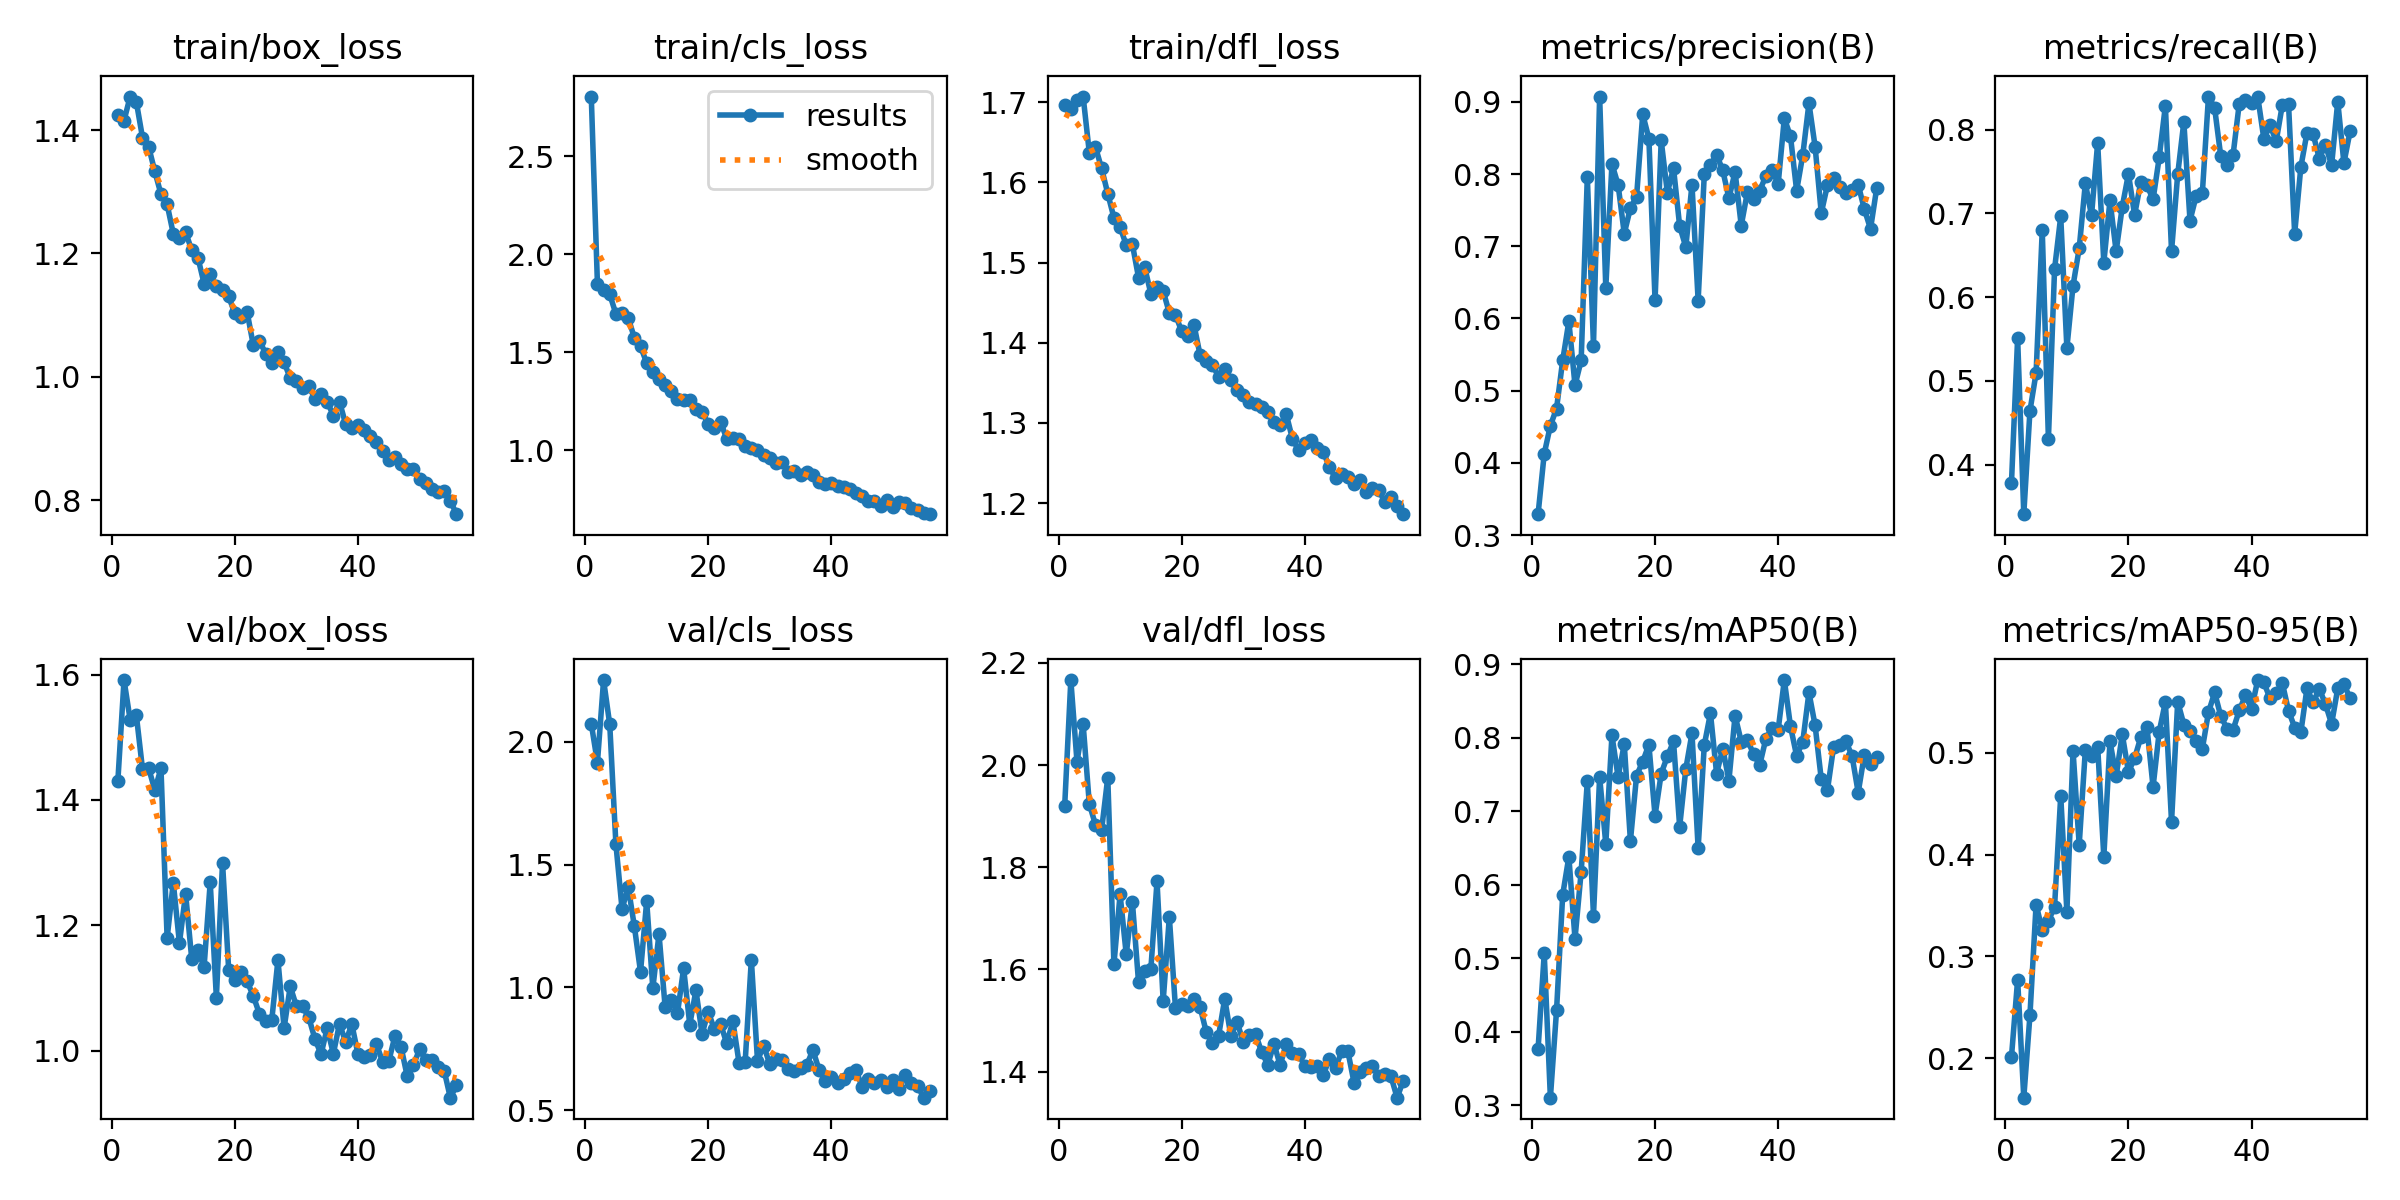

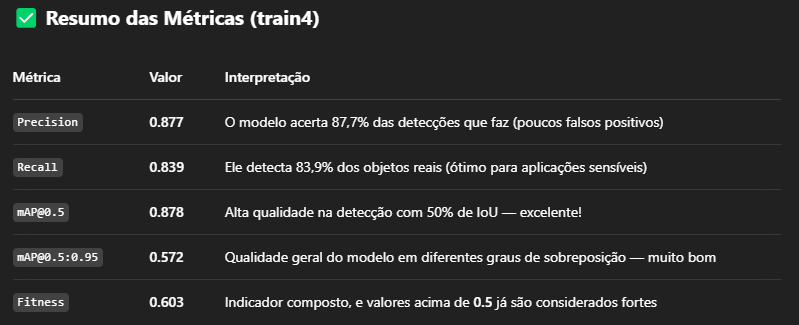

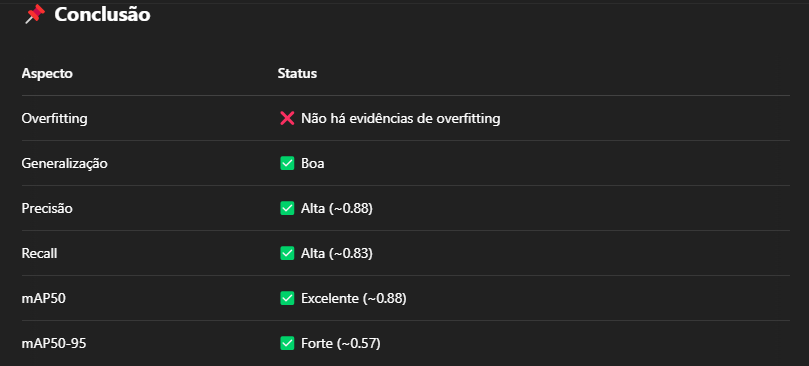

In [ ]:
#✅ Código de Teste SMTP para Gmail
import smtplib

# Configurações SMTP
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
EMAIL_USER = "visionfiap@gmail.com"
EMAIL_PASSWORD = "ebet xgvh mjje gpzh"  # Senha de App do Gmail

try:
    # Conectar ao servidor
    server = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
    server.starttls()
    server.login(EMAIL_USER, EMAIL_PASSWORD)
    print("✅ Conexão e autenticação SMTP bem-sucedida!")
    server.quit()
except smtplib.SMTPAuthenticationError as e:
    print("❌ Erro de autenticação SMTP:", e.smtp_error.decode())
except Exception as e:
    print("❌ Outro erro:", str(e))


✅ Conexão e autenticação SMTP bem-sucedida!


In [ ]:
# 📧 Sistema de Alertas com Capturas (Versão Final)
import smtplib
import email.utils
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
import cv2
from datetime import datetime
import os
from collections import deque
import time
from ultralytics import YOLO

# ================= CONFIGURAÇÕES =================
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
EMAIL_USER = "visionfiap@gmail.com"
EMAIL_PASSWORD = "ebet xgvh mjje gpzh"  # Senha de app do Google
ALERT_RECIPIENTS = ["dassenhoritas@terra.com.br", "contato@dassenhoritas.com.br"]
ALERT_DIR = "/content/drive/MyDrive/alertas"
os.makedirs(ALERT_DIR, exist_ok=True)

# ================= CONTROLE DE ALERTAS =================
alert_history = deque(maxlen=10)  # Máximo 10 alertas/minuto

def should_send_alert():
    """Previne flood de e-mails"""
    now = time.time()
    if len(alert_history) >= 10 and (now - alert_history[0]) < 60:
        print("⚠️ Muitos alertas recentes - Modo silencioso ativado")
        return False
    alert_history.append(now)
    return True

def send_alert(frame, detected_objects, confidence):
    """Envia e-mail com imagem anexada"""
    if not should_send_alert():
        return

    try:
        # 1. Salvar imagem temporária
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        img_path = f"{ALERT_DIR}/alerta_{timestamp}.jpg"
        cv2.imwrite(img_path, frame)

        # 2. Criar e-mail
        msg = MIMEMultipart()
        msg['Subject'] = f"🚨 ALERTA: {detected_objects} detectado (Conf: {confidence:.0%})"
        msg['From'] = EMAIL_USER
        msg['To'] = ", ".join(ALERT_RECIPIENTS)

        # Corpo do e-mail (HTML)
        html = f"""
        <h2>VisionGuard - Detecção de Objeto Perigoso</h2>
        <p><b>Objeto:</b> {detected_objects}</p>
        <p><b>Confiança:</b> {confidence:.0%}</p>
        <p><b>Horário:</b> {timestamp.replace('_', ' ')}</p>
        <img src="cid:alerta_image" width="800">
        """
        msg.attach(MIMEText(html, 'html'))

        # Anexar imagem
        with open(img_path, 'rb') as f:
            img_data = f.read()
        image = MIMEImage(img_data, name=os.path.basename(img_path))
        image.add_header('Content-ID', '<alerta_image>')
        msg.attach(image)

        # 3. Enviar
        with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
            server.starttls()
            server.login(EMAIL_USER, EMAIL_PASSWORD)
            server.send_message(msg)

        print(f"📧 Alerta enviado: {detected_objects} ({confidence:.0%})")

    except Exception as e:
        print(f"❌ Erro no envio: {str(e)}")

# ================= PROCESSAMENTO DE VÍDEO =================
def process_video(video_path, model_path="runs/detect/train/weights/best.pt"):
    cap = cv2.VideoCapture(video_path)
    model = YOLO(model_path)

    # Configuração do vídeo de saída
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    output_path = os.path.join(ALERT_DIR, "video_processado.mp4")
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, conf=0.5)
        annotated_frame = results[0].plot()  # Frame com marcações

        # Salva cada frame processado
        out.write(annotated_frame)

        for box in results[0].boxes:
            class_name = model.names[int(box.cls)]
            confidence = float(box.conf)
            if class_name in ['Knife', 'knife', 'scissors', 'weapon'] and confidence > 0.6:
                send_alert(annotated_frame, class_name, confidence)

    # Libera recursos
    cap.release()
    out.release()
    print(f"🎥 Vídeo processado salvo em: {output_path}")

# ================= EXECUÇÃO =================
if __name__ == "__main__":
    process_video("/content/drive/MyDrive/Hackaton FIAP5/video.mp4")
    print("✅ Processamento concluído! Verifique:")
    print(f"- Vídeo com marcações: {ALERT_DIR}/video_processado.mp4")
    print(f"Alertas por e-mail e imagens em: {ALERT_DIR}/alerta_*.jpg")  # Linha corrigida


0: 384x640 1 knife, 38.5ms
Speed: 2.6ms preprocess, 38.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
📧 Alerta enviado: knife (89%)

0: 384x640 1 knife, 9.7ms
Speed: 3.8ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
📧 Alerta enviado: knife (89%)

0: 384x640 1 knife, 20.4ms
Speed: 5.7ms preprocess, 20.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
📧 Alerta enviado: knife (88%)

0: 384x640 1 knife, 14.1ms
Speed: 3.7ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
📧 Alerta enviado: knife (86%)

0: 384x640 1 knife, 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
📧 Alerta enviado: knife (86%)

0: 384x640 1 knife, 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
📧 Alerta enviado: knife (83%)

0: 384x640 1 knife, 8.8ms
Speed: 5.6ms preprocess, 8.8ms inference, 1.4ms p

In [26]:
from google.colab import drive
import shutil

# 1️⃣ Montar seu Google Drive
#drive.mount('/content/drive')

# 2️⃣ Copiar a pasta runs para uma pasta no seu Drive
shutil.copytree("/content/runs", "/content/drive/MyDrive/Hackaton FIAP5/runs", dirs_exist_ok=True)

print("✅ Pasta 'runs/' copiada para seu Drive com sucesso!")


✅ Pasta 'runs/' copiada para seu Drive com sucesso!
